# Data cleaning and merging dataframes

## Loading multiple datasets

### Google way

In [1]:
import pandas as pd

# orderlines.csv
url = 'https://drive.google.com/file/d/14Y7g5ITyf6LMyPoKc9wr010V9StaCUux/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders.csv
url = 'https://drive.google.com/file/d/1BLEHcP-9fm9Rv7A01H3co2XBMnSr66YC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands.csv
url = 'https://drive.google.com/file/d/1BrNrIY0F1LbyXtyaQygUBXVxQGB3JBqx/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products.csv
url = 'https://drive.google.com/file/d/1UfsHI80cpQqGfsH2g4T4Tsw8cWayOfzC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

df_list = [orderlines, orders, brands, products]
files = ['orderlines','orders','brands','products']

### Classical way

Reading file by file

In [4]:
# import pandas as pd
import pandas as pd
path = '../data/eniac/'
orderlines = pd.read_csv(path + 'orderlines.csv')
orders = pd.read_csv(path + 'orders.csv')
brands = pd.read_csv(path + 'brands.csv')
products = pd.read_csv(path + 'products.csv')

# df_list = [orderlines, orders, brands, products]
# files = ['orderlines','orders','brands','products']

### Another way

Using `os` and a loop to read all the files from a directory. It's also possible to read only files with a certain extension (like `.csv`):

In [343]:
# import pandas as pd
# import os
# path = '../data/eniac/'
# path, dirs, files = next(os.walk(path))
# #print(files)

# # remove non-csv files
# for file in files:
#     if not file.endswith("csv"):
#         files.remove(file)

In [344]:
# # create empty list 
# df_list = []

# # append datasets to the list
# for file in files:
#     temp_df = pd.read_csv(path + file, sep=',')
#     df_list.append(temp_df)

# # show results
# products, orders, orderlines, brands = df_list[0], df_list[1], df_list[2], df_list[3]

## Data quality

### Missing values

In [5]:
# we can check missing values column
orderlines.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [6]:
# or for the whole dataframe
orderlines.isna().sum().sum()

# the .info() method also tells us the "Non-Null Count" for each column
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'total_paid'}>]], dtype=object)

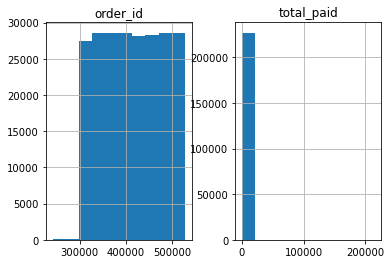

In [9]:
orders.hist()

In [10]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [11]:
brands

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
...,...,...
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


### Duplicates

The presence of duplicate rows is generally a sign that the data is not clean, and will deserve further exploration.

In [13]:
type(orderlines.duplicated()) # Series of duplicated values

pandas.core.series.Series

In [14]:
orderlines.duplicated().sum()

0

In [15]:
orders.duplicated().sum()

0

In [16]:
brands.duplicated().sum()

0

In [17]:
products.duplicated().sum() # There are 8746 products with duplicated values

8746

### Data cleanliness - initial assessment

In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [19]:
products.isna().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

In [20]:
products.sample(10)

,sku,name,desc,price,promo_price,in_stock,type
8305,PAC1585,"Apple iMac 21.5 ""Core i7 3.3GHz 4K Retina | 16...",Desktop computer iMac 21.5-inch 3.3GHz Core i7...,3649,2749.99,0,1282
10459,PAC1602,"Apple iMac 27 ""Core i7 Retina 5K 4Ghz | 16GB R...",IMac desktop computer 27 inch Retina 5K 4GHz C...,3769,3056.99,0,"5,74E+15"
1515,PAC1821,Pack Synology DS1515 + | WD 30TB Network,DS1515 + NAS 8GB of memory and 30TB hard drive...,2285.92,19.579.627,0,12175397
1233,ELG0034,Avea Elgato Smart Bulb,Bluetooth bulb lighting multimode iPhone iPad ...,39.99,379.892,0,11905404
15370,REP0346,Load Connector Repair iPad 4,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11"
6061,PAC1062,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 32GB...",IMac desktop computer 27 inch 5K Retina i5 3.3...,3649,30.809.903,0,"5,74E+15"
15729,APP2025,Open - iPhone 5S 16GB Silver,Free Apple iPhone 5s Apple Refurbished 16GB Si...,409,2.803.304,0,1716
2428,FCM0004-2,Mac memory FCM 4GB (2x2GB) 667MHz DDR2 SO-DIMM,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) Ma...,58,499.899,0,1364
3288,APP1384,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 8GB | ...",IMac desktop computer 27 inch 8GB RAM 2TB 5K R...,3229,30.745.846,0,"5,74E+15"
14624,WDT0357,WD My Passport 2TB External Hard Drive 25 USB ...,2TB External Hard Drive USB 3.0 with Mac and P...,124.99,949.947,1,11935397


Based on our initial exploration, we know we will need to deal with some missing values. The biggest issue so far are the duplicates on the `products` DataFrame. Here are some aspects that we will need to fix or, at least, explore further:

* **products**: 
    * `price` and `promo_price` are loaded as objects. They should be floats. 
    * Missing values: 
        * `description`: 7 missing values. Maybe that could be inferred from the product name?
        * `price`: the missing values could be filled from the `orderlines` dataset. But first we will need to clean it. 
    * Duplicates: a total of 8746 duplicates seems to indicate this DataFrame has been seriously corrupted.
    
* **orders**: 
    * `created_date` should have a date data type. Then, it would be a good quality check to see if the created date for `orders` mathces with the created dates for `orderlines`. 
    
* **orderlines**: 
    * `unit_price` has to be a float, something is wrong there. 
    * `date` has to be transformed to a date data type. Then, as we said, check that it with matches with the `orders` dataset. 
    
* **brands**: looks fine. 

Where do we have to start? 

1. **Data consistency:** Since `orders` and `orderlines` seem very crucial to the analysis, we will start by cleaning them and checking that the information present in both DataFrames match.

2. **The "products mess":** This file seems to have many issues. We will leave it out for now and perform a proper exploration later to understand better what's going on there.

## Cleaning orders

The data consistency check we will do with `orderlines` will involve two steps: 

* the initial and last dates of the orders should be the same
* the sum of `total_paid` on both datasets should be the same

Let's start by transforming the `created_date` of the orders DataFrame and looking for its earliest and latest values:

In [21]:
# change date datatype
orders['created_date'] = pd.to_datetime(orders['created_date'])

In [22]:
# earliest value
min(orders['created_date'])

Timestamp('2017-01-01 00:07:19')

In [23]:
# latest value
max(orders['created_date'])

Timestamp('2018-03-14 13:58:36')

In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


Now we will look at the overall sum of `total_paid` for the orders table:

In [25]:
sum(orders['total_paid'])

nan

In [26]:
orders['total_paid'].isna().sum() # 5 missing values in this column

5

Why do you think the result of the sum is a nan (not a number)?

In [27]:
orders.total_paid.isna().sum()

5

There are missing values! We can explore them and see how they are all "Pending" orders:

In [28]:
orders.loc[orders['total_paid'].isna()]

,order_id,created_date,total_paid,state
127701,427314,2017-11-20 18:54:39,NaN,Pending
132013,431655,2017-11-22 12:15:24,NaN,Pending
147316,447411,2017-11-27 10:32:37,NaN,Pending
148833,448966,2017-11-27 18:54:15,NaN,Pending
149434,449596,2017-11-27 21:52:08,NaN,Pending


Since these orders are only a tiny fraction and there's a valid reason why the `total_paid` value is missing, we will simply exclude them from the dataset:

In [29]:
orders.dropna(inplace=True)

In [30]:
orders.loc[orders['total_paid'].isna()] # Now there is no missing values

,order_id,created_date,total_paid,state


In [31]:
orders.info() # Now all rows have no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  int64         
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.7+ MB


Now the dataset is clean. And the total paid is: 

In [32]:
round(orders['total_paid'].sum(),2) # Round total paid in 2 decimal nummer

129159615.07

## Cleaning orderlines

Following our data consistency check, will now gather in the orderlines DataFrame the same information we got from orders:

* the initial and last dates
* the sum of `total_paid`


First let's transform our date time:

In [33]:
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [34]:
min(orderlines['date'])
# orders: Timestamp('2017-01-01 00:07:19')

Timestamp('2017-01-01 00:07:19')

In [35]:
max(orderlines['date'])
# orders: Timestamp('2018-03-14 13:58:36')

Timestamp('2018-03-14 13:58:36')

**It's a match!**

Now let's check the `total_paid` for orderlines. It's not going to be as easy as with the orders DataFrame, considering the structure of orderlines:


In [36]:
orderlines.head(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11


In [37]:
orderlines.sort_values(by = 'product_quantity', ascending = False).iloc[70:100]

,id,id_order,product_id,product_quantity,sku,unit_price,date
86266,1284768,373746,0,27,WDT0379,414.99,2017-07-06 16:49:44
229216,1546001,485159,0,26,BOS0052,199.00,2018-01-08 10:34:29
115339,1349855,398761,0,26,KAN0059,44.60,2017-09-11 11:39:04
142780,1399216,422772,0,26,KEN0237,29.99,2017-11-06 20:56:29
142793,1399236,422784,0,26,APP1634,872.00,2017-11-06 21:17:26
132465,1380681,413829,0,25,WAC0171,51.99,2017-10-18 09:34:00
145054,1403378,357497,0,25,APP0434,23.99,2017-11-10 17:44:02
145052,1403376,357497,0,25,APP0438,22.99,2017-11-10 17:43:11
131624,1379183,413085,0,25,CRU0051,150.58,2017-10-16 13:46:48
52087,1225050,344660,0,25,KIN0149,8.49,2017-04-09 16:26:53


In [38]:
orderlines.groupby(['id_order', 'sku']).agg({'product_quantity': 'count'}).sort_values(by = 'product_quantity', ascending = False)

product_quantity
id_order sku                      
455540   APP1919                 2
455794   APP1919                 2
491926   REP0088                 2
377561   APP1919                 2
398536   ALL0010                 2
...                            ...
383262   KIN0150                 1
         SAN0155                 1
         TUC0331                 1
383263   APP1636                 1
527401   APP0927                 1

[293977 rows x 1 columns]


To get this value, we will have to calculate a new column, total price for each row. It would be `product_quantity` * `unit_price`. This operation will require that both columns have a numeric data type:

In [39]:
orderlines.dtypes

id                           int64
id_order                     int64
product_id                   int64
product_quantity             int64
sku                         object
unit_price                  object
date                datetime64[ns]
dtype: object

...it's not the case right now, so we will have to transform the `unit_price` to a numeric data type. 

In [40]:
# uncomment the line of code below and read the error it produces:
# orderlines['product_quantity'] * pd.to_numeric(orderlines['unit_price'])

While trying to transform this column to numeric an error appears. From the error message, 

> "Unable to parse string '1.137.99' at position 6"

it seems that our dataset has some problems with the thousands separators: they were encoded as dots, and Python & pandas only admit one dot per number: the _decimal_ separator!

Lesson learned: do not use thousand separators in databases / statistical software / programming languages! Sadly, it's too late for us, and we will have to deal with the issue.

There are many ways to approach this problem. The first thing we will do is to count how many dots appear for each `unit_price` value, using string operations. If there are two or more dots a value, we will consider it corrupted —and either try to fix it, or remove it completely.

In [41]:
# we create a copy of the dataset
ol_temp = orderlines.copy()

# create a new column with the amount of dots in the unit_price column
ol_temp['dots'] = orderlines['unit_price'].str.count('\.') # the backslash 'escapes' the special meaning of '.' in string operations

# show the rows with more than one dot
ol_temp.query('dots > 1')

,id,id_order,product_id,product_quantity,sku,unit_price,date,dots
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21,2
11,1119126,299549,0,1,PAC0929,2.565.99,2017-01-01 02:07:42,2
15,1119131,299553,0,1,APP1854,3.278.99,2017-01-01 02:14:47,2
43,1119195,299582,0,1,PAC0961,2.616.99,2017-01-01 08:54:00,2
59,1119214,299596,0,1,PAC1599,2.873.99,2017-01-01 09:53:11,2
...,...,...,...,...,...,...,...,...
293862,1649999,452946,0,1,APP2075,2.999.00,2018-03-14 13:03:33,2
293887,1650045,527321,0,1,PAC2148,3.497.00,2018-03-14 13:10:15,2
293889,1650050,527324,0,1,PAC2117,3.075.00,2018-03-14 13:10:56,2
293911,1650088,527342,0,1,APP2492,1.329.00,2018-03-14 13:24:51,2


Our theory about the thousands separators is confirmed. How can we solve this problem? 

Let's remove all the dots for all the `unit_price`, and then add a dot before the last 2 digits to all the rows. Then we will transform it into numeric values.

##### step 1: remove all dots
a) A "corrupted" price like `1.137.99`	will become `113799`

b) A correct price like `37.99`	will become `3799`

##### step 2: add dots two digits before the end of the number
a) The "corrupted" price will go from `113799` to `1137.99`

b) The correct price will go from `3799` back to `37.99`.

In [42]:
# step 1: to remove the dots, we replace them for... nothing
orderlines = orderlines.assign(unit_price_nd = orderlines['unit_price'].str.replace('\.','', regex=True))
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,1899
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,39900
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,47405
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,6839
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2374


In [43]:
# step 2.1: we first separate all numbers between the part that goes before the
# decimal point (integers) and the part that goes afterwards (deimals)
orderlines['integers'] = orderlines['unit_price_nd'].str[:-2]
orderlines['decimals'] = orderlines['unit_price_nd'].str[-2:]
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd,integers,decimals
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,1899,18,99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,39900,399,00
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,47405,474,05
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,6839,68,39
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2374,23,74


In [44]:
# step 2.2: we now concatenate those two parts of the number, with a dot in between
orderlines['new_unit_price'] = orderlines['integers'] + '.' + orderlines['decimals']
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd,integers,decimals,new_unit_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,1899,18,99,18.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,39900,399,00,399.00
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,47405,474,05,474.05
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,6839,68,39,68.39
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2374,23,74,23.74


We will now try again to convert this column to a numeric data type:

In [45]:
orderlines['unit_price'] = pd.to_numeric(orderlines['new_unit_price'])
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
 7   unit_price_nd     293983 non-null  object        
 8   integers          293983 non-null  object        
 9   decimals          293983 non-null  object        
 10  new_unit_price    293983 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 24.7+ MB


Data cleaning done! 

Back to data consistency: Now it is time to multiply `product_quantity` and `unit price`, sum all the rows and check whether the value matches the sum of the `total_paid` from the orders DataFrame: 

In [46]:
# drop 'auxiliary' columns
orderlines.drop(['unit_price_nd','decimals','integers','new_unit_price'], axis=1, inplace=True)

# create a new column "total_price" by multiplying product_quantity times unit_price
orderlines['total_price'] = orderlines['product_quantity'] * orderlines['unit_price']

# sum of the new column "total_price":
round(sum(orderlines['total_price']),2)

128776222.03

In [47]:
round(sum(orderlines['total_price']),2)

128776222.03

Sadly, it does not match exactly with the sum of `total_paid` from orders:

In [48]:
round(orders['total_paid'].sum(),2)

129159615.07

The mismatch is about 383 thousand dollars, a non-neglegible amount of money:

In [49]:
round(sum(orderlines['total_price']) - orders['total_paid'].sum(), 2)

-383393.04

How can we figure out where does the difference come from? 

## Matching `orders` and `orderlines`

It is possible that some orders exist in one dataset but not in the other one. This would be a potential source for this price mismatch. Let's find out!

We first create a new column in the `orderlines` dataset using `assign`. We also use `isin()` to create a boolen value (True/False) that checks whether the `id_order` is present in the `orders` dataset:

In [50]:
orderlines.assign(check_orders = orderlines['id_order'].isin(orders['order_id']))

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True
...,...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True


Then, using `.query` we select rows where the value in this new column is `False`:

In [51]:
(
orderlines
    .assign(check_orders = orderlines['id_order'].isin(orders['order_id']))
    .query("check_orders==False")
)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27,2317.90,False
63,1119218,296284,0,1,BNQ0042,699.00,2017-01-01 09:58:35,699.00,False
67,1119223,294806,0,1,APP1849,2558.99,2017-01-01 10:09:15,2558.99,False
69,1119226,294806,0,1,APP1864,2797.99,2017-01-01 10:15:14,2797.99,False
70,1119235,297261,0,1,QNA0177,304.99,2017-01-01 10:17:59,304.99,False
...,...,...,...,...,...,...,...,...,...
275665,1621177,244328,0,1,OWC0260,349.00,2018-02-20 13:00:45,349.00,False
280055,1628699,261391,0,1,APP2352,3343.00,2018-02-27 11:43:25,3343.00,False
280352,1629247,287797,0,1,SYN0182,484.11,2018-02-27 19:16:26,484.11,False
280856,1630150,261391,0,1,SAT0091,44.99,2018-02-28 12:18:26,44.99,False


In [52]:
(
    round(
orderlines
    .assign(check_orders = orderlines['id_order'].isin(orders['order_id']))
    .query("check_orders==False")
    ['total_price'].sum(), 2)    
) # The difference is less than what we expect 

116828.26

It looks like 240 rows in `orderlines` come from orders not present in the `orders` dataset. This is quite inconsistent, since the `orders` dataset should be the one and only source of truth for orders: if an order is not there, it should not exist. We will definitely report this anomaly, but for now, let's just remove those "ghost" orders:

In [53]:
orderlines = (orderlines
              .assign(check_orders = orderlines['id_order'].isin(orders['order_id']))
              .query("check_orders==True"))

Now let's look at this problem in the opposite direction: are there orders in the `orders` dataset not prsent in `orderlines`?

In [54]:
(orders
 .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
 .query("check_orders==False"))

,order_id,created_date,total_paid,state,check_orders
8,245941,2017-01-01 10:32:23,183.52,Completed,False
65,268629,2017-01-31 11:27:25,73.23,Completed,False
75,272862,2017-04-18 18:17:10,128.99,Pending,False
82,277655,2017-02-01 08:44:55,9.99,Pending,False
83,277994,2017-01-23 18:30:11,52.99,Completed,False
...,...,...,...,...,...
226835,527328,2018-03-14 13:14:12,0.00,Shopping Basket,False
226851,527344,2018-03-14 13:25:21,0.00,Place Order,False
226853,527346,2018-03-14 13:26:14,0.00,Place Order,False
226855,527348,2018-03-14 13:28:18,0.00,Place Order,False


There are more than 22000 orders in the `orders` dataset that are not present on the `orderlines` dataset!!! We can try to find out why by looking at the state of these orders:

In [55]:
(orders
 .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
 .query("check_orders==False")
 ['state'].value_counts())

Place Order        12304
Shopping Basket     9810
Completed             45
Cancelled             41
Pending               13
Name: state, dtype: int64

It looks like most of them are orders that were not fully completed: the products were left in the shopping basket or the order was "placed" but maybe not paid (hence the state "Place Order". Some of them were "Completed", though. 

This will require further research, and we might have to come back to these orders if we have to explore consumer behaviour (e.g. why are orders left in the shopping basket?), but for now, for the sake of data consistency, let's drop all of these unmatched orders:

In [56]:
orders = (orders
          .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
          .query("check_orders==True")
         )

Let's now check again if the total paid matches:

In [57]:
orders['total_paid'].sum()

129130877.18

In [58]:
orderlines['total_price'].sum()

128659393.77

STILL NOT MATCHING!!! And actually, the difference got larger. This is outrageous. Let's keep exploring.

In [59]:
orderlines['total_price'].sum() - orders['total_paid'].sum()

-471483.4100000113

## Solving the price mismatch

Let's merge both datasets and compare, order by order, the `total_price`. We will call this new merged dataset `orders_info`.

*Note: Remember that the `orderlines` dataset contains one row per product bought: an order where 3 different products were purchased will result in 3 rows there. Therefore, to merge `orderlines` with `orders`, we have to group `orderlines` by its `id_order` and aggregate it by taking the sum of the `total_price`.

In [60]:
orders_info = (
orderlines
    .groupby('id_order')
    .agg({'total_price':'sum'})
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .copy()
)
orders_info

,total_price,order_id,created_date,total_paid,state,check_orders
0,44.99,241319,2017-01-02 13:35:40,44.99,Cancelled,True
1,129.16,241423,2017-11-06 13:10:02,136.15,Completed,True
2,10.77,242832,2017-12-31 17:40:03,15.76,Completed,True
3,77.99,243330,2017-02-16 10:59:38,84.98,Completed,True
4,153.87,243784,2017-11-24 13:35:19,157.86,Cancelled,True
...,...,...,...,...,...,...
204686,42.99,527397,2018-03-14 13:56:38,42.99,Place Order,True
204687,42.99,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True
204688,141.58,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True
204689,19.98,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True


Now that the `total` from both datasets is in the same dataframe, we can create a new column with the difference:

In [61]:
orders_info['price_difference'] = orders_info['total_price'] - orders_info['total_paid']
orders_info.sort_values('price_difference').tail(10)

,total_price,order_id,created_date,total_paid,state,check_orders,price_difference
194349,388.06,515818,2018-02-22 01:02:35,6.59,Shopping Basket,True,381.47
186388,1124.00,506820,2018-02-06 13:34:20,1.33,Shopping Basket,True,1122.67
179022,1558.00,498550,2018-01-25 17:57:06,3.81,Shopping Basket,True,1554.19
162308,1958.36,479621,2018-01-02 13:33:37,26.38,Shopping Basket,True,1931.98
201739,1968.00,524152,2018-03-09 21:00:48,6.59,Shopping Basket,True,1961.41
192913,2342.00,514198,2018-02-19 11:40:55,6.59,Shopping Basket,True,2335.41
193911,3038.00,515325,2018-02-21 11:31:20,13.19,Shopping Basket,True,3024.81
188169,3112.59,508818,2018-02-09 13:43:30,6.59,Shopping Basket,True,3106.00
197889,7771.23,519801,2018-03-02 08:59:34,31.22,Shopping Basket,True,7740.01
56804,250802.37,361200,2017-06-01 11:55:02,214642.47,Shopping Basket,True,36159.90


In [62]:
orders_info['price_difference'].describe()

count    204691.000000
mean         -2.303391
std         297.461827
min      -90898.610000
25%          -0.010000
50%           0.000000
75%           0.000000
max       36159.900000
Name: price_difference, dtype: float64

<AxesSubplot:>

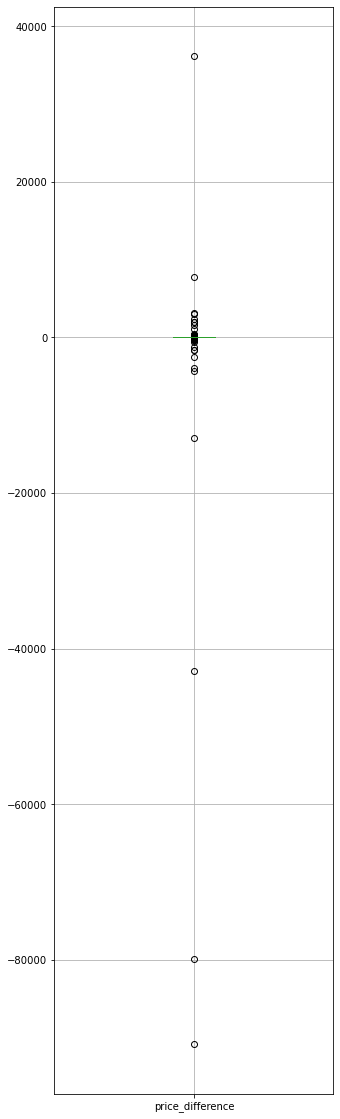

In [63]:
orders_info.boxplot(column = 'price_difference', figsize=(5,20))

Looks like the maximum and minimun price differences are huge: some orders are really corrupted. But we also see from the mean and the quartiles that the price difference is neglegible for most orders.

In [64]:
orders_info[(orders_info['price_difference']>-5) & (orders_info['price_difference']<5)]

,total_price,order_id,created_date,total_paid,state,check_orders,price_difference
0,44.99,241319,2017-01-02 13:35:40,44.99,Cancelled,True,0.00
2,10.77,242832,2017-12-31 17:40:03,15.76,Completed,True,-4.99
4,153.87,243784,2017-11-24 13:35:19,157.86,Cancelled,True,-3.99
5,149.00,245275,2017-06-28 11:35:37,149.00,Completed,True,0.00
7,79.99,245851,2017-04-04 20:58:21,79.99,Pending,True,0.00
...,...,...,...,...,...,...,...
204686,42.99,527397,2018-03-14 13:56:38,42.99,Place Order,True,0.00
204687,42.99,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True,0.00
204688,141.58,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True,0.00
204689,19.98,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True,0.00


## Challenge: Remove outliers

Decide on a criteria for removing orders whenever you cannot trust the price difference between `orders` and `orderlines`. 

Note: this solution does not completely achieve 100% trustable data, but the objective here is to end up with the best possible data with a limited amount of time, which makes a complete revision of the database protocols and the data pipelines is not feasable - and business questions are pending. Documenting and reporting this data cleaning process, including the criteria that you will use for determining what do you consider an "outlier", is key. Not being paralized by it is also important!

In [65]:
# you code here
a = 5
orders_info_clean = orders_info[(orders_info['price_difference']>-a) & (orders_info['price_difference']<a)]

In [66]:
orders_info_clean

,total_price,order_id,created_date,total_paid,state,check_orders,price_difference
0,44.99,241319,2017-01-02 13:35:40,44.99,Cancelled,True,0.00
2,10.77,242832,2017-12-31 17:40:03,15.76,Completed,True,-4.99
4,153.87,243784,2017-11-24 13:35:19,157.86,Cancelled,True,-3.99
5,149.00,245275,2017-06-28 11:35:37,149.00,Completed,True,0.00
7,79.99,245851,2017-04-04 20:58:21,79.99,Pending,True,0.00
...,...,...,...,...,...,...,...
204686,42.99,527397,2018-03-14 13:56:38,42.99,Place Order,True,0.00
204687,42.99,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True,0.00
204688,141.58,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True,0.00
204689,19.98,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True,0.00


In [67]:
orderlines

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True
...,...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True


In [68]:
orderlines_clean = orderlines[orderlines['id_order'].isin(orders_info_clean['order_id'])]
orderlines_clean.sort_values('total_price', ascending = False)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
46666,1215369,340045,0,21,PAC0874,9841.99,2017-03-28 13:29:48,206681.79,True
36979,1197439,331780,0,1,NEA0009,159989.83,2017-03-03 22:29:21,159989.83,True
39923,1203123,334310,0,98,APP1632,1019.00,2017-03-12 12:59:10,99862.00,True
204637,1500715,464858,0,192,APP1662,519.00,2017-12-17 15:53:04,99648.00,True
151704,1419940,430951,0,21,APP2355,4717.59,2017-11-22 02:00:55,99069.39,True
...,...,...,...,...,...,...,...,...,...
206466,1504285,466485,0,1,WAC0228,0.00,2017-12-19 09:16:23,0.00,True
206465,1504284,466485,0,1,APP1629,0.00,2017-12-19 09:16:23,0.00,True
67212,1251356,357473,0,1,LIBRO,0.00,2017-05-20 02:44:38,0.00,True
60361,1239311,350898,0,1,LIBRO,0.00,2017-05-01 17:57:44,0.00,True


In [69]:
orders

,order_id,created_date,total_paid,state,check_orders
0,241319,2017-01-02 13:35:40,44.99,Cancelled,True
1,241423,2017-11-06 13:10:02,136.15,Completed,True
2,242832,2017-12-31 17:40:03,15.76,Completed,True
3,243330,2017-02-16 10:59:38,84.98,Completed,True
4,243784,2017-11-24 13:35:19,157.86,Cancelled,True
...,...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order,True
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True


In [70]:
orders_clean = orders[orders['order_id'].isin(orders_info_clean['order_id'])]
orders_clean

,order_id,created_date,total_paid,state,check_orders
0,241319,2017-01-02 13:35:40,44.99,Cancelled,True
2,242832,2017-12-31 17:40:03,15.76,Completed,True
4,243784,2017-11-24 13:35:19,157.86,Cancelled,True
5,245275,2017-06-28 11:35:37,149.00,Completed,True
7,245851,2017-04-04 20:58:21,79.99,Pending,True
...,...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order,True
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True


Save the data once you are sure you can trust it!

In [71]:
orders_clean.sort_values(by = 'total_paid', ascending = False)

,order_id,created_date,total_paid,state,check_orders
96028,395611,2017-09-01 20:56:34,214747.53,Shopping Basket,True
2478,301934,2017-01-03 19:27:13,214746.63,Shopping Basket,True
40557,340045,2017-03-28 13:27:52,214517.58,Shopping Basket,True
32296,331780,2017-03-03 22:29:21,159989.83,Shopping Basket,True
188457,488935,2018-01-11 21:11:34,121521.85,Shopping Basket,True
...,...,...,...,...,...
184312,484719,2018-01-07 23:14:36,0.00,Shopping Basket,True
211592,512083,2018-02-15 15:26:16,0.00,Shopping Basket,True
211594,512085,2018-02-15 15:29:01,0.00,Shopping Basket,True
211595,512086,2018-02-15 15:29:11,0.00,Shopping Basket,True


In [72]:
# run the code only once your "orderlines" and "orders" are clean
orderlines_clean.to_csv('orderlines_clean.csv', index=False)
orders_clean.to_csv('orders_clean.csv', index=False)

# from google.colab import files
# files.download("orderlines_clean.csv")
# files.download("orders_clean.csv")

In [73]:
# from google.colab import files
# files.download("orderlines_clean.csv")
# files.download("orders_clean.csv")

## Challenge: Cleaning products

Now it is time to clean the products dataset. Let's do a quick review of its major problems: 

In [74]:
print(products.info(), "\n")
print("Missing values:", products.isna().sum(), "\n")
print("Duplicate rows:", products.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB
None 

Missing values: sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64 

Duplicate rows: 8746


In [75]:
products.loc[products['desc'].isna(),'desc'] = products.loc[products['desc'].isna(), 'name']

In [76]:
# products[products['desc'].isna(),'desc'] = products[products['desc'].isna(), 'name'] does not work without .loc

In [77]:
print(products.info())
print(products.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19326 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB
None
sku             0
name            0
desc            0
price          46
promo_price     0
in_stock        0
type           50
dtype: int64


In [78]:
import numpy as np
print(np.nan)
products[pd.isna(products['desc'])]['desc']

nan


Series([], Name: desc, dtype: object)

In [79]:
pd.isna(products['desc']).sum()

0

In [80]:
print(products.info())
print(products.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19326 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB
None
sku             0
name            0
desc            0
price          46
promo_price     0
in_stock        0
type           50
dtype: int64


Looking at this overview, we can see that there are different things that have to be changed: 

* Data types: 
    * `price` should be a float
    * `promo price` should be a float
* Duplicated rows. They have to be removed. 
    * To accomplish this step you can use the method `pd.DataFrame.drop_duplicates()`. Be sure you drop all the duplicates based on the column **sku**, as it is the one you will use to merge with orderlines. 
* Missing values: 
    * Description maybe can be inferred by the name
    * `price`. Is there a way we can extract the information from another table?
    * `type`. Do we need this column for our analysis?
    
This task can be accomoplished by using all the methods you already know.

### Start of the challenge

#### Duplicates

In [81]:
# code here
products_check_price = products.copy()
products_check_price.drop_duplicates(subset = 'sku', inplace = True)
products_check_price.info() # Remove duplicated values. Remaning items is 10579

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10579 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10579 non-null  object
 1   name         10579 non-null  object
 2   desc         10579 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10579 non-null  object
 5   in_stock     10579 non-null  int64 
 6   type         10529 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB


In [82]:
orderlines_clean[['sku', 'unit_price']].nunique() #.sku.nunique() # There are 7781 unique sku

sku            7781
unit_price    10521
dtype: int64

In [83]:
orderlines_price = (
orderlines_clean
    [['sku', 'unit_price']].drop_duplicates()
    .sort_values(by = ['sku', 'unit_price'], ascending = [False, False])
    .groupby('sku').agg({'unit_price': ['min', 'max']})['unit_price']    
)

In [84]:
orderlines_price['difference'] = orderlines_price['max'] - orderlines_price['min']
orderlines_price['percent_diff'] = orderlines_price['difference']/orderlines_price['max']*100
orderlines_price.reset_index(inplace = True)
orderlines_price.sort_values(by = 'min')

,sku,min,max,difference,percent_diff
768,APP1465,-119.00,99.99,218.99,219.011901
2141,BOS0035,0.00,249.99,249.99,100.000000
464,APP0438,0.00,25.00,25.00,100.000000
460,APP0434,0.00,25.00,25.00,100.000000
458,APP0430-A,0.00,29.29,29.29,100.000000
...,...,...,...,...,...
1763,APP2672,11385.01,11385.01,0.00,0.000000
1768,APP2684,11621.00,11621.00,0.00,0.000000
1770,APP2694,12071.00,12071.00,0.00,0.000000
1759,APP2660,12175.24,14580.00,2404.76,16.493553


In [85]:
orderlines_price.query('difference <100')

,sku,min,max,difference,percent_diff
0,8MO0001-A,12.96,12.96,0.00,0.000000
1,8MO0003-A,12.85,12.85,0.00,0.000000
2,8MO0007,19.99,23.99,4.00,16.673614
3,8MO0008,19.99,23.99,4.00,16.673614
4,8MO0009,14.70,23.99,9.29,38.724469
...,...,...,...,...,...
7776,ZAG0040,29.99,29.99,0.00,0.000000
7777,ZAG0041,19.99,19.99,0.00,0.000000
7778,ZAG0042,19.99,19.99,0.00,0.000000
7779,ZEP0007,125.99,139.90,13.91,9.942816


In [86]:
orderlines_price.rename(columns ={'min': 'min_price', 'max': 'max_price'}, inplace = True)
orderlines_price.sort_values('min_price')

,sku,min_price,max_price,difference,percent_diff
768,APP1465,-119.00,99.99,218.99,219.011901
2141,BOS0035,0.00,249.99,249.99,100.000000
464,APP0438,0.00,25.00,25.00,100.000000
460,APP0434,0.00,25.00,25.00,100.000000
458,APP0430-A,0.00,29.29,29.29,100.000000
...,...,...,...,...,...
1763,APP2672,11385.01,11385.01,0.00,0.000000
1768,APP2684,11621.00,11621.00,0.00,0.000000
1770,APP2694,12071.00,12071.00,0.00,0.000000
1759,APP2660,12175.24,14580.00,2404.76,16.493553


In [87]:
orderlines.query("sku=='APP1465'").sort_values('unit_price')

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
77008,1268645,365886,0,1,APP1465,-119.00,2017-06-15 12:48:54,-119.00,True
238705,1561983,491412,0,1,APP1465,0.00,2018-01-15 16:26:52,0.00,True
285323,1637294,511776,0,1,APP1465,82.64,2018-03-05 21:52:40,82.64,True
96603,1303813,380090,0,1,APP1465,82.64,2017-07-27 07:34:56,82.64,True
150048,1415209,426915,0,1,APP1465,82.64,2017-11-20 13:35:15,82.64,True
...,...,...,...,...,...,...,...,...,...
112389,1344388,396164,0,1,APP1465,99.99,2017-09-04 03:15:52,99.99,True
113250,1345910,396883,0,1,APP1465,99.99,2017-09-05 21:28:57,99.99,True
113379,1346141,396998,0,1,APP1465,99.99,2017-09-06 10:24:37,99.99,True
114958,1349141,398408,0,1,APP1465,99.99,2017-09-10 16:11:11,99.99,True


In [88]:
orderlines.query('sku =="APP0434"').sort_values('unit_price')

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
280909,1630244,518855,0,1,APP0434,0.00,2018-02-28 12:58:22,0.00,True
280903,1630238,518854,0,1,APP0434,0.00,2018-02-28 12:58:16,0.00,True
34933,1193494,330029,0,1,APP0434,20.89,2017-02-27 20:12:09,20.89,True
160009,1433858,437579,0,1,APP0434,21.59,2017-11-24 09:12:39,21.59,True
148857,1412855,428087,0,1,APP0434,21.59,2017-11-17 22:15:27,21.59,True
...,...,...,...,...,...,...,...,...,...
17391,1159354,314862,0,1,APP0434,25.00,2017-01-25 19:18:11,25.00,True
15022,1154460,312910,0,1,APP0434,25.00,2017-01-21 14:10:17,25.00,True
14888,1154194,312780,0,2,APP0434,25.00,2017-01-21 02:27:11,50.00,True
13947,1152358,312027,0,1,APP0434,25.00,2017-01-19 12:02:01,25.00,True


In [89]:
(
orderlines_clean
    [orderlines_clean['sku'].isin(orderlines_price.query("min_price < = 0")['sku'])]
    .groupby('sku')['unit_price'].min()
) # Could not use min as column in query

sku
ADN0059    0.0
ALL0008    0.0
ALL0009    0.0
ALL0013    0.0
ALL0014    0.0
          ... 
XDO0043    0.0
ZAG0021    0.0
ZAG0022    0.0
ZAG0024    0.0
ZAG0036    0.0
Name: unit_price, Length: 257, dtype: float64

In [90]:
orderlines_price.query('min_price<0')

,sku,min_price,max_price,difference,percent_diff
768,APP1465,-119.0,99.99,218.99,219.011901


In [91]:
orderlines_clean = orderlines_clean[orderlines_clean['unit_price'] >= 0] # Delete item with price less than 0

In [92]:
orderlines_clean

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True
...,...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True


In [93]:
orderlines_clean.to_csv('orderlines_clean.csv', index=False) # Update orderlines

In [94]:
# products_check_price.merge(orderlines[['sku', 'unit_price']], on = 'sku', how = 'left')

In [95]:
print(products_check_price.info())
print(products_check_price.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10579 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10579 non-null  object
 1   name         10579 non-null  object
 2   desc         10579 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10579 non-null  object
 5   in_stock     10579 non-null  int64 
 6   type         10529 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB
None
sku             0
name            0
desc            0
price          45
promo_price     0
in_stock        0
type           50
dtype: int64


In [96]:
products_check_price

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


In [97]:
products_check_price.price.fillna('0', inplace = True)

#### Fix data types

In [98]:
# code here
# products['price_new'] = pd.to_numeric(products.price) raise to error
import numpy as np
#products_check_price = products_check_price['price'].fillna('0')
products_check_price['price_new'] = products_check_price['price'].str.split('.')
products_check_price['decimal_part'] = products_check_price['price_new'].apply(lambda x : '0' if len(x)==1 else x[-1])
products_check_price['integer_part'] = products_check_price['price_new'].apply(lambda x: x[0] if len(x) == 1 else ''.join(x[0:len(x)-1]))
products_check_price['price_final'] = products_check_price['integer_part']+'.'+products_check_price['decimal_part']
products_check_price['price_final'] = pd.to_numeric(products_check_price['price_final'])
# products_check_price['price_final'] = np.where(products_check_price['price_new'].str.len() == 3, products_check_price['price_final']/100, products_check_price['price_final'])

In [99]:
# products_check_price = products_check_price.fillna('0')

In [100]:
products_check_price['price_new'] = products_check_price['price'].str.split('.')
products_check_price

,sku,name,desc,price,promo_price,in_stock,type,price_new,decimal_part,integer_part,price_final
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,"[59, 99]",99,59,59.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401,[59],0,59,59.00
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387,[59],0,59,59.00
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230,[25],0,25,25.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,"[34, 99]",99,34,34.99
...,...,...,...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,"[29, 99]",99,29,29.99
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,"[69, 95]",95,69,69.95
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,"[69, 95]",95,69,69.95
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,"[69, 95]",95,69,69.95


In [101]:
products_check_price['decimal_part'] = products_check_price['price_new'].apply(lambda x : '00' if len(x)==1 else x[-1])

In [102]:
products_check_price.sample(10)

,sku,name,desc,price,promo_price,in_stock,type,price_new,decimal_part,integer_part,price_final
3067,APP1155,Case Apple iPhone 6 Plus / 6s Plus Silicone Ca...,Ultrathin silicone case and microfiber premium...,45,420.003,0,11865403,[45],00,45,45.000
17542,OWC0252,Mac OWC Memory 1GB 533MHz DDR2 DIMM,RAM 1GB iMac G5 / PowerMac G5.,14.99,149.895,0,1364,"[14, 99]",99,14,14.990
16245,PAC2122,"Apple iMac 27 ""Core i5 Retina 5K 38GHz | 64GB ...",IMac desktop computer 27 inch 5K Retina 64GB S...,4519,34.690.045,0,"5,74E+15",[4519],00,4519,4519.000
1899,SAN0035,SanDisk Ultra 16GB SDHC Memory Card Class 10,16GB SDHC memory card.,14,70.906,0,NaN,[14],00,14,14.000
12497,SPE0170,Speck CandyShell iPhone 6 / 6S Black,Ultra resistant transparent housing black and ...,24.95,179.915,0,11865403,"[24, 95]",95,24,24.950
39,JMO0026,Just Mobile Lazy Couch Support Mac and iPad,Mac and iPad small lift stand.,19.95,199.892,0,8696,"[19, 95]",95,19,19.950
15865,LEX0044,Workflow Lexar Professional USB 3.0 Dock HR1,Dock box 4 bay compatible with USB 3.0 and SSD...,84.99,649.903,0,12995397,"[84, 99]",99,84,84.990
16607,APP2332,"Apple MacBook Pro 15 ""Core i7 Touch Bar 31GHz ...",New MacBook Pro 15-inch Touch Bar to 31GHz Cor...,3159,29.380.046,0,"1,02E+12",[3159],00,3159,3159.000
15291,NOM0023,Nomad Horween Leather Strap Leather strap brow...,Brown leather belt with silver buckle for 42mm...,59.95,529.895,0,2449,"[59, 95]",95,59,59.950
1059,MOP0059,Mophie Space Pack Battery Case (1700mAh) and S...,Housing with battery and 32GB external storage...,1.599.862,1.599.862,0,"5,49E+11","[1, 599, 862]",862,1599,1599.862


In [103]:
products_check_price['integer_part'] = products_check_price['price_new'].apply(lambda x: x[0] if len(x) == 1 else ''.join(x[0:(len(x)-1)]))

In [104]:
x=[1, 2, 3, 4, 5]
x[0: (len(x)-1)]

[1, 2, 3, 4]

In [105]:
products_check_price.sample(10)

,sku,name,desc,price,promo_price,in_stock,type,price_new,decimal_part,integer_part,price_final
13519,BEL0282,Belkin Sport Armband Plus-Fit Bracelet Black i...,Light neoprene armband with reflective bands a...,29.99,169.896,1,5405,"[29, 99]",99,29,29.99
3149,ADN0034,Adonit Jot Stylus Dash Plata,Professional pointer for iPad iPod and iPhone.,49.99,449.902,0,1229,"[49, 99]",99,49,49.99
15456,PAC2188,Pack Qnap TS-453b mini 4G NAS server 24TB (4x6...,NAS with HDMI 4K (3840x2160) 4-core processor ...,1539.09,12.313.686,0,12175397,"[1539, 09]",09,1539,1539.09
18058,GTE0114,G-Technology G-DRIVE mobile SSD R-Series 500GB...,SSD USB 3.1 interface Resistive Gen 2 (10Gb / ...,215.99,1.819.949,1,12215397,"[215, 99]",99,215,215.99
12896,WIT0028,Withings Body Scale White Bluetooth,measurement scale APP for iPad and iPhone,129.95,1.199.897,0,11905404,"[129, 95]",95,129,129.95
13249,MAC0120-A,(Open) U3HUBA Macally USB 3.0 4-Port Hub,Hub 4 ports USB 3.0 High Speed ​​for Mac and PC,34.95,195.817,0,1298,"[34, 95]",95,34,34.95
1220,PAR0021,Parrot Jumping Sumo brown MiniDrone,MiniDrone Remote iPhone iPad and iPod Touch.,159.99,889.955,0,11905404,"[159, 99]",99,159,159.99
16641,APP2123,"Apple iPad Pro 10.5 ""Wi-Fi 256GB Space Gray",MPDY2TY / A,899,872.001,0,106431714,[899],00,899,899.00
16244,PAC2120,"Apple iMac 27 ""Core i5 3.8GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3559,31.190.045,0,"5,74E+15",[3559],00,3559,3559.00
11584,TWS0043-A,(Open) Twelve South HiRise Support iPhone 5 / ...,Lightning adjustable support for iPhone 5 / 5S...,39.99,294.732,0,1298,"[39, 99]",99,39,39.99


In [106]:
products_check_price['price_final'] = products_check_price['integer_part']+'.'+products_check_price['decimal_part']
products_check_price['price_final'] = pd.to_numeric(products_check_price['price_final'])

In [107]:
products_check_price.sample(10)

,sku,name,desc,price,promo_price,in_stock,type,price_new,decimal_part,integer_part,price_final
13423,EVU0008,AER Karbon iPhone Case Evutec 8 Plus / 7 Black...,0.7mm thick cover resistant materials and qual...,39.95,299.899,1,11865403,"[39, 95]",95,39,39.95
1572,PAC0582,Synology DS415 + Pack + 8TB Seagate Desktop,Synology DS415 + Pack 8TB Seagate Desktop for ...,934.95,8.389.898,0,12175397,"[934, 95]",95,934,934.95
12920,IHE0012-A,(Open) iHealth Blood Pressure MUI Feel ± eca i...,Bluetooth Smart meter voltage APP for iPhone i...,79.95,59.99,0,1298,"[79, 95]",95,79,79.95
78,SEA0044,"Seagate Barracuda 3TB 35 ""SATA hard drive Mac ...",internal hard drive Mac and PC 3TB (ST3000DM008).,112,849.045,1,12655397,[112],00,112,112.00
97,MAK0014,Maclocks safety housing Kiosk iPad 2 3 and 4 b...,Holder and housing iPad 2 3 and 4 aluminum and...,164.99,1.649.896,0,1216,"[164, 99]",99,164,164.99
1072,STM0056,STM Bags Trust Bandolier MacBook Air / Pro 13 ...,Bandolier STM MacBook 13 inches.,89.99,799.895,0,1392,"[89, 99]",99,89,89.99
13514,BEL0295,Belkin SheerForce Air Protect Case iPhone 6 / ...,Cover with compact design and wear resistant m...,24.99,199.904,0,11865403,"[24, 99]",99,24,24.99
14937,PAC1888,Crucial MX300 275GB SSD expansion kit for Mac ...,SSD upgrade kit for Mac mini 275GB Mid 2011 to...,153.38,1.285.843,0,1433,"[153, 38]",38,153,153.38
16407,APP2278,"Apple MacBook Pro 13 ""Core i5 Touch Bar 31GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 31 G...,2239,21.270.046,1,"1,02E+12",[2239],00,2239,2239.00
18304,DJI0023,Spark DJI Drone Fly More Combo White,Drone cuadricóptero camera with integrated bat...,799,7.989.993,0,11905404,[799],00,799,799.00


In [108]:
orderlines_clean.sample(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
197797,1490006,460300,0,1,SAT0054,79.99,2017-12-11 21:40:29,79.99,True
237479,1560075,490690,0,1,MOX0014,5.09,2018-01-14 20:23:39,5.09,True
99660,1309502,385304,0,1,MUV0172,9.99,2017-08-02 09:40:47,9.99,True
255019,1587762,501219,0,1,ZAG0036,19.99,2018-01-29 16:09:19,19.99,True
54736,1229636,346955,0,1,APP1975,479.00,2017-04-18 10:16:41,479.00,True
162760,1438837,439912,0,1,APP2226,2460.59,2017-11-24 16:09:51,2460.59,True
202104,1495950,462648,0,1,APP1645,626.00,2017-12-14 09:10:05,626.00,True
194380,1485281,458506,0,1,SAT0053,79.99,2017-12-09 21:09:25,79.99,True
195829,1487067,459122,0,1,APP0663,199.00,2017-12-10 20:06:30,199.00,True
172112,1454170,446456,0,1,IFX0125,42.49,2017-11-26 22:57:24,42.49,True


In [109]:
# products.drop('decemal_part', inplace = True, axis = 1)
products_check_price.sort_values(by = 'price_final', ascending = False).sample(10)

,sku,name,desc,price,promo_price,in_stock,type,price_new,decimal_part,integer_part,price_final
6297,PAC1067,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB |...",IMac desktop computer 27 inch 5K Retina i7 4GH...,4189,33.999.899,0,"5,74E+15",[4189],00,4189,4189.000
16158,LGE0061,"29UM69G-B LG Monitor 29 ""QHD sRGB 99% 1ms USB-...",ultrapanorámico Monitor 29-inch QHD resolution...,299,2.769.993,0,1296,[299],00,299,299.000
17611,PAC2225,DS418J Synology NAS Server | 32TB (4x8TB) WD Red,4 bay NAS server capable of transmitting H.265...,1750.99,1.268.368,0,12175397,"[1750, 99]",99,1750,1750.990
17599,MOS0225,Moshi Vitros Transparent Clear Case iPhone X,Case designed to be fully compatible with the ...,25,199.904,1,11865403,[25],00,25,25.000
18726,TAD0002-A,Open - Tado V2 Intelligent Heating Thermostat,Smart Thermostat refurbished and bridge with a...,1.799.899,1.512.253,0,11905404,"[1, 799, 899]",899,1799,1799.899
17656,APP2529,Apple iPhone Leather Case Cover Skin 8/7 (PROD...,ultrathin leather case and microfiber premium ...,55,519.998,1,11865403,[55],00,55,55.000
3091,NDE0015,Ndevr children iPadding Case iPad Air 1 & 2 Blue,Housing with special animal design kids for iP...,44.99,299.899,0,12635403,"[44, 99]",99,44,44.990
3080,APP1158,Case Apple iPhone 6 Plus / 6s Plus Silicone Ca...,Ultrathin silicone case and microfiber premium...,45,420.003,0,11865403,[45],00,45,45.000
367,APP0437,Apple EarPods headset with microphone connecto...,IPhone iPad and iPod headphones with microphon...,35,330.003,1,5384,[35],00,35,35.000
13801,APP1842,"Apple MacBook Pro 13 ""with Touch Bar GHz Core ...",New MacBook Pro 13-inch Core i5 Touch Bar 29 G...,2239,2.065.591,0,2158,[2239],00,2239,2239.000


In [110]:
products_check_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10579 entries, 0 to 19325
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           10579 non-null  object 
 1   name          10579 non-null  object 
 2   desc          10579 non-null  object 
 3   price         10579 non-null  object 
 4   promo_price   10579 non-null  object 
 5   in_stock      10579 non-null  int64  
 6   type          10529 non-null  object 
 7   price_new     10579 non-null  object 
 8   decimal_part  10579 non-null  object 
 9   integer_part  10579 non-null  object 
 10  price_final   10579 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 991.8+ KB


In [111]:
products_check_price.drop(['decimal_part', 'integer_part'], axis =1, inplace = True)

## Extract price from orderlines to product table

In [112]:
orderlines_unit_price = orderlines_clean.groupby('sku').unit_price.mean().reset_index()
orderlines_unit_price.sort_values('unit_price')

,sku,unit_price
2548,ENV0505,0.000
3720,LIBRO,0.000
2181,CAD0010,0.290
2180,CAD0008,1.390
5880,PAR0037,2.115
...,...,...
1756,APP2648,11518.154
1768,APP2684,11621.000
1770,APP2694,12071.000
1758,APP2659,13799.000


In [113]:
product_orderlines_merge = (
products_check_price
    .merge(orderlines_unit_price, how = 'left', on = 'sku')
    .sort_values('price_final', ascending = True)
    # .unit_price.isna().sum()
    # .query('price_final == 0')
).copy()

In [114]:
product_orderlines_merge.sort_values('price_final', ascending = False).query('unit_price >= 0')

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price
8743,APP2490,Apple iPhone 64GB X Silver,New Apple iPhone 64GB Free Silver X,115.900.092,11.590.009,1,113271716,"[115, 900, 092]",115900.092,1149.836791
4062,APP1498,"Apple iPad Pro 9.7 ""Wi-Fi + Cellular 32GB Silver",9.7-inch Apple iPad Pro Wi-Fi + Cellular 32GB ...,83.281.154,8.328.115,0,12141714,"[83, 281, 154]",83281.154,818.000000
745,REP0185,Home button repair iPad mini,Repair service including parts and labor for i...,69.989.909,699.899,0,"1,44E+11","[69, 989, 909]",69989.909,62.663333
702,REP0156,iPhone 5 GSM antenna repair,Repair service including parts and labor for i...,69.989.909,699.899,0,"1,44E+11","[69, 989, 909]",69989.909,68.990000
7550,PAC2309,Synology DS1817 + | 16GB RAM | 96TB (8x12TB) S...,NAS with 16GB of RAM and 96TB for Mac and PC,51.577.892,41.217.464,0,12175397,"[51, 577, 892]",51577.892,4376.750000
...,...,...,...,...,...,...,...,...,...,...
4293,CEL0029,Celly extensible arm selfie with Bluetooth but...,selfie extendable arm for iPhone,0,69.902,0,5720,[0],0.000,6.990000
1720,CEL0007,Celly Wallet Case with removable cover Black i...,Case Book for iPhone 6 card case type.,0,128.998,0,11865403,[0],0.000,12.900000
1727,CEL0015,Celly fur-lined Powerbank battery 4000mAh Black,Leather-wrapped External Battery 4000mAh for i...,0,239.895,0,1515,[0],0.000,23.990000
4292,CEL0028,Celly Swing Arm button selfie with Bluetooth B...,selfie extendable arm for iPhone,0,59.895,0,11905404,[0],0.000,9.665000


In [115]:
product_orderlines_merge[product_orderlines_merge['price_new'].str.len() == 3].sort_values('price_final', ascending = False).sample(5)

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price
505,CRU0015-2,Crucial memory Mac 16GB (2x8GB) SO-DIMM DDR3 1...,RAM 16GB (2x8GB) 135V MacBook Pro iMac (2012/2...,1.639.792,1.629.894,1,1364,"[1, 639, 792]",1639.792,140.29146
1751,PAC0802,Pack QNAP TS-251 | 8TB Seagate Desktop,Pack QNAP TS-251 + 8TB Seagate Hard Drive Desk...,5.108.693,4.909.902,0,12175397,"[5, 108, 693]",5108.693,NaN
2389,SMA0008,Smanos Alarm System X300 GSM / SMS,Wireless alarm with SMS control for iPhone.,1.999.888,1.999.888,0,11905404,"[1, 999, 888]",1999.888,NaN
10238,NET0026,Arlo Netgear accessory rechargeable battery ch...,Netgear charging station for rechargeable batt...,6.999.003,69.99,0,9094,"[6, 999, 003]",6999.003,NaN
4992,PAC2029,Synology DS216 + II | Seagate 4TB IronWolf for...,Synology DS216 + II with 2GB of RAM and 12TB (...,9.339.496,771.179,0,12175397,"[9, 339, 496]",9339.496,774.58500


In [116]:
temp =(
product_orderlines_merge
    [product_orderlines_merge['unit_price'].notnull()].assign(ration_price = lambda x: x.price_final/x.unit_price)
    .sort_values('ration_price', ascending = False)
    #.describe()
)
temp

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,ration_price
745,REP0185,Home button repair iPad mini,Repair service including parts and labor for i...,69.989.909,699.899,0,"1,44E+11","[69, 989, 909]",69989.909,62.663333,1116.919661
702,REP0156,iPhone 5 GSM antenna repair,Repair service including parts and labor for i...,69.989.909,699.899,0,"1,44E+11","[69, 989, 909]",69989.909,68.990000,1014.493535
3572,KIN0150,Kingston DataTraveler SE9 32Gb USB 3.0 G2,32GB pendrive light and small.,1.728.001,17.28,0,57445397,"[1, 728, 001]",1728.001,10.970796,157.509166
6538,SAN0131-A,"Open - SanDisk 120GB SSD Plus 25 ""SATA 6Gb / s",SSD 120GB 25 inches,6.352.863,635.286,0,1298,"[6, 352, 863]",6352.863,51.248333,123.962334
3620,SAN0138,SanDisk Ultra microSDXC 128GB Memory Card + SD...,And adapter card memory 128 GB microSDXC Class...,5.028.034,502.803,0,57445397,"[5, 028, 034]",5028.034,46.603448,107.889742
...,...,...,...,...,...,...,...,...,...,...,...
4318,CEL0058,Celly IceCube Case iPhone 6 / 6S Plus Rosa,Anti-shock Case for iPhone 6 / 6S Plus,0,99.898,0,11865403,[0],0.000,9.990000,0.000000
4319,CEL0059,Celly IceCube Case iPhone 6 / 6S Plus White,Anti-shock Case for iPhone 6 / 6S Plus,0,119.899,0,11865403,[0],0.000,10.990000,0.000000
4315,CEL0055,Celly IceCube Case iPhone 6 / 6S White,Anti-shock Case for iPhone 6 / 6S,0,119.899,0,11865403,[0],0.000,11.990000,0.000000
1730,CEL0023,Celly Ambo Luxury Leather Case + Case Gold iPh...,Cover and housing together with magnet for iPh...,0,329.894,0,11865403,[0],0.000,32.990000,0.000000


## There are two rows with ratio more than 1000 need to be divided by 1000

In [117]:
product_orderlines_merge[product_orderlines_merge.sku.isin(temp[temp.ration_price >1000].sku)].loc[:,'price_final'] = \
product_orderlines_merge[product_orderlines_merge.sku.isin(temp[temp.ration_price >1000].sku)]['price_final'] /1000

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_29188\1243701319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_orderlines_merge[product_orderlines_merge.sku.isin(temp[temp.ration_price >1000].sku)].loc[:,'price_final'] = \


In [118]:
product_orderlines_merge['price_final_1'] = np.where(product_orderlines_merge.sku.isin(temp[temp.ration_price >1000].sku), \
                                                     product_orderlines_merge['price_final']/1000, product_orderlines_merge['price_final'])

In [119]:
product_orderlines_merge#.loc[[745, 702],] # Done with multiplication with 1000

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1
4304,CEL0038,Celly Frost Cover for iPhone 6 / 6S Rosa,Ultra Thin Case for iPhone 6 and 6s,0,89.903,0,11865403,[0],0.000,NaN,0.000
5067,CEL0034-A,(Open) Celly iPhone 6S Plus Housing Frost White,Ultra Thin Case for iPhone 6 and 6s Plus,0,74.893,0,1298,[0],0.000,NaN,0.000
4312,CEL0052,Celly 4000mAh Battery Power Bank Aluminum Silver,external battery capacity 4000mAh output volta...,0,199.892,0,1515,[0],0.000,23.918571,0.000
1579,AII0008,Aiino Case MacBook Air 11 '' Transparent,MacBook Air 11-inch casing with matte finish.,0,22.99,0,13835403,[0],0.000,NaN,0.000
1730,CEL0023,Celly Ambo Luxury Leather Case + Case Gold iPh...,Cover and housing together with magnet for iPh...,0,329.894,0,11865403,[0],0.000,32.990000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
8092,APP2310,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443
8079,APP2296,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443
8090,APP2307,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443
8085,APP2299,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443


In [120]:
temp =(
product_orderlines_merge
    [product_orderlines_merge['unit_price'].notnull()].assign(ration_price = lambda x: x.price_final_1/x.unit_price)
    .sort_values('ration_price', ascending = False)
    #.describe()
)
temp

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,ration_price
3572,KIN0150,Kingston DataTraveler SE9 32Gb USB 3.0 G2,32GB pendrive light and small.,1.728.001,17.28,0,57445397,"[1, 728, 001]",1728.001,10.970796,1728.001,157.509166
6538,SAN0131-A,"Open - SanDisk 120GB SSD Plus 25 ""SATA 6Gb / s",SSD 120GB 25 inches,6.352.863,635.286,0,1298,"[6, 352, 863]",6352.863,51.248333,6352.863,123.962334
3620,SAN0138,SanDisk Ultra microSDXC 128GB Memory Card + SD...,And adapter card memory 128 GB microSDXC Class...,5.028.034,502.803,0,57445397,"[5, 028, 034]",5028.034,46.603448,5028.034,107.889742
2981,IOT0018,iOttie iTap magnetic car holder for iPhone,Magnetic car holder compatible with all models...,2.499.013,249.901,1,5720,"[2, 499, 013]",2499.013,23.506413,2499.013,106.311967
6882,REP0298,volume button repair on vibration control and ...,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11","[6, 999, 003]",6999.003,66.952500,6999.003,104.536843
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,CEL0059,Celly IceCube Case iPhone 6 / 6S Plus White,Anti-shock Case for iPhone 6 / 6S Plus,0,119.899,0,11865403,[0],0.000,10.990000,0.000,0.000000
4307,CEL0033,"Celly Waterproof iPad Case / Air / Pro 97 ""Tra...",waterproof protective case for iPad bag format...,0,149.895,0,12635403,[0],0.000,14.990000,0.000,0.000000
4315,CEL0055,Celly IceCube Case iPhone 6 / 6S White,Anti-shock Case for iPhone 6 / 6S,0,119.899,0,11865403,[0],0.000,11.990000,0.000,0.000000
1730,CEL0023,Celly Ambo Luxury Leather Case + Case Gold iPh...,Cover and housing together with magnet for iPh...,0,329.894,0,11865403,[0],0.000,32.990000,0.000,0.000000


In [121]:
temp[(temp.ration_price>15)&(temp.ration_price<80)] # Divided by 10

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,ration_price
3086,BEL0145-A,Open - Belkin Switch + Motion WeMO Wi-Fi contr...,Kit + motion switch for sensor devices via App.,999.944,254.736,0,1298,"[999, 944]",999.944,25.470000,999.944,39.259678
6296,PIE0034-A,Open - Piece Internal Battery iPhone 6,Replacement internal battery for Apple iPhone 6,349.896,117.944,0,21485407,"[349, 896]",349.896,11.790000,349.896,29.677354
6078,QNA0183,QNAP TVS-871U-RP NAS server i3 4GB RAM,Rail format NAS 8 bays 4 Ethernet ports (10GbE...,21.759.902,21.759.902,0,12175397,"[21, 759, 902]",21759.902,791.211250,21759.902,27.502013
5840,MUV0158-A,"Open - Muvit Armband Universal Fino 47-57 ""Bla...",sporty and comfortable armband for iPhone 5 / ...,199.892,115.524,0,1298,"[199, 892]",199.892,11.287143,199.892,17.709708
7527,PAC1969,Synology DS1817 + | 8GB RAM | 32TB (8x4TB) Sea...,NAS with 8GB RAM and 32TB for Mac and PC,25.317.885,19.757.461,0,12175397,"[25, 317, 885]",25317.885,1535.045000,25317.885,16.493253
7524,PAC1966,Synology DS1817 + | 8GB RAM,NAS with 8GB RAM and 8 bays compatible with SA...,11.068.685,10.719.898,0,12175397,"[11, 068, 685]",11068.685,708.337778,11068.685,15.626281


In [122]:
temp[(temp.ration_price>14)&(temp.ration_price<15)] # Divide by 10

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,ration_price
6492,PUR0136-A,Open - Puro UltraSlim Case 03 + Protector iPho...,03mm thin cover with screen protector included...,129.906,88.977,0,1298,"[129, 906]",129.906,8.900000,129.906,14.596180
5792,KIN0153-A,(Open) Kingston SO-DIMM memory 8GB 1600Mhz DDR3åÊ,RAM 8GB 135V / 15V MacBook Pro iMac (2013) and...,739.891,650.088,0,1298,"[739, 891]",739.891,50.720000,739.891,14.587756
1633,PAC0784,Samsung SSD 850 expansion kit EVO 500GB + 16GB...,Expansion kit SSD 500GB + 16GB 1600Mhz RAM + D...,4.519.592,353.585,1,1433,"[4, 519, 592]",4519.592,318.232222,4519.592,14.202182
6663,PUR0144-A,"Open - Pure Nude Ultraslim 03 ""7 Clear iPhone ...",flexible transparent cover with 03mm thick iPh...,129.906,91.828,0,1298,"[129, 906]",129.906,9.180000,129.906,14.150980
6387,DLK0068-A,Open - D-Link GO-SW-5E 5 port Fast Ethernet Sw...,D-Link GO-SW-5E 5 port 10/100 Mbps Fast Ethernet,89.903,63.555,0,1298,"[89, 903]",89.903,6.360000,89.903,14.135692
1249,PAC0549,Kingston V300 SSD expansion kit 120GB + Datado...,120GB + Datadoubler expansion for Late 2008 Ma...,1.699.795,1.325.845,0,1433,"[1, 699, 795]",1699.795,120.808571,1699.795,14.070152
6428,KIN0149-A,Open - Mac Memory Kingston 8GB SO-DIMM DDR3åÊ1...,8GB RAM iMac (2010/2011) Mac mini (2011) and M...,829.891,629.847,0,1298,"[829, 891]",829.891,59.030000,829.891,14.058801


In [123]:
temp[(temp.ration_price>8)&(temp.ration_price<14)] # Divide by 10

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,ration_price
4918,DLL0024-A,"Open - Dell UltraSharp 25 Monitor UP2516D """,25-inch LED Monitor Marco Slim for Mac and PC,4.589.893,4.173.156,0,1298,"[4, 589, 893]",4589.893,327.980000,4589.893,13.994430
8200,APP0660-A,"Open - AppleCare Protection MacBook Pro 15 """,Apple Care extended warranty MacBook Pro 15-in...,3.490.003,2.531.065,0,1298,"[3, 490, 003]",3490.003,253.110000,3490.003,13.788483
8934,IHE0017-A,Open - iHealth Align Intelligent Mini glucímetro,MiniLector glucímoco connected to iPhone.,199.904,157.555,0,1298,"[199, 904]",199.904,14.575000,199.904,13.715540
6833,MYK0016-A,Open - MyKronoz ZeCircle Black Clock,Smartwatch that monitors sleep for iPhone iPad...,599.918,438.777,0,1298,"[599, 918]",599.918,43.880000,599.918,13.671787
3410,KAN0022-A,Open - Kanex adapter Thunderbolt to Ethernet +...,Gigabyte Thunderbolt adapter cable to Ethernet...,1.199.897,903.296,0,1298,"[1, 199, 897]",1199.897,88.505000,1199.897,13.557392
...,...,...,...,...,...,...,...,...,...,...,...,...
10429,MOP0106,Mophie Powerstation 6000mAh battery Universal ...,external battery capacity 6000mAh output volta...,89.95,359.902,0,1515,"[89, 95]",89.950,9.990000,89.950,9.004004
10336,MOP0108,Mophie Powerstation Mini Universal 4000mAh Bat...,external battery capacity 4000mAh output volta...,69.95,79.896,0,1515,"[69, 95]",69.950,7.990000,69.950,8.754693
7211,PAC1927,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",IMac used 20 inch Core 2 Duo 226GHz | 2GB RAM ...,2.360.303,2.855.967,0,1282,"[2, 360, 303]",2360.303,280.820690,2360.303,8.405018
10335,MOP0107,Mophie Powerstation 4000mAh Battery Plus Mini ...,external battery capacity 4000mAh output volta...,69.95,269.903,0,1515,"[69, 95]",69.950,8.421818,69.950,8.305807


In [124]:
temp[(temp.ration_price>0)&(temp.ration_price<2)] # Choose threshold 2 to modifies the price

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,ration_price
8533,TUC0328,Tucano tugo Large Backpack 38L MacBook Pro 13 ...,Backpack 38 liter single compartment handles a...,69.9,349.896,0,1392,"[69, 9]",69.90,34.990000,69.90,1.997714
8536,TUC0330,Tucano tugo Large Backpack 38L MacBook Pro 13 ...,38L backpack cabin with pockets for single com...,69.9,349.896,0,1392,"[69, 9]",69.90,34.990000,69.90,1.997714
8545,TUC0341,"Agio case Tucano Macbook Pro / Retina 15 ""Gray...",nylon bag with internal compartment antivibrat...,69.9,349.896,0,10230,"[69, 9]",69.90,34.990000,69.90,1.997714
8534,TUC0329,Tucano tugo Large Backpack 38L MacBook Pro 13 ...,Backpack 38 liter single compartment handles a...,69.9,349.896,0,1392,"[69, 9]",69.90,34.990000,69.90,1.997714
8528,TUC0327,Tucano tugo Medium Backpack 20L MacBook Pro 13...,Backpack 20 liter single compartment handles a...,59.9,299.899,0,1392,"[59, 9]",59.90,29.990000,59.90,1.997332
...,...,...,...,...,...,...,...,...,...,...,...,...
4712,IFX0074,iFixit piece Earpiece Speaker iPhone 6,Handset internal speaker for iPhone 6,7.99,59.895,1,21485407,"[7, 99]",7.99,13.643333,7.99,0.585634
5369,SHE0045,SwitchEasy iPhone Case 8 Plus 0.35 / 7 Plus White,Ultra Thin Case for iPhone 8 Plus / 7 Plus in ...,9.99,39.906,0,11865403,"[9, 99]",9.99,18.106667,9.99,0.551730
362,SEV0021,SSD installation service MacBook Pro Retina,Installing SSD in your MacBook Pro Retina + Da...,49.99,499.851,0,20642062,"[49, 99]",49.99,134.087273,49.99,0.372817
829,NEA0009,Netatmo home thermostat for iPhone and iPad,Thermostat iPhone iPad wifi Mac design Stark.,179,174.989,0,11905404,[179],179.00,509.107244,179.00,0.351596


In [125]:
orderlines_clean[orderlines_clean.sku=='PAC2281']

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
135103,1385510,416168,0,2,PAC2281,255.59,2017-10-23 11:39:50,511.18,True
135418,1386032,416422,0,1,PAC2281,255.59,2017-10-23 19:43:24,255.59,True
137651,1390111,418418,0,2,PAC2281,255.59,2017-10-27 03:54:36,511.18,True
140650,1395517,420939,0,1,PAC2281,255.59,2017-11-02 09:35:58,255.59,True
141478,1396942,421657,0,1,PAC2281,255.59,2017-11-03 20:59:56,255.59,True
142883,1399385,422855,0,1,PAC2281,255.59,2017-11-07 02:46:23,255.59,True
143145,1399859,423084,0,1,PAC2281,255.59,2017-11-07 17:18:01,255.59,True
144233,1401768,424007,0,1,PAC2281,255.59,2017-11-09 23:09:21,255.59,True
144658,1402560,424397,0,1,PAC2281,255.59,2017-11-10 11:12:12,255.59,True
147244,1407335,426708,0,1,PAC2281,255.59,2017-11-14 12:47:25,255.59,True


In [126]:
product_orderlines_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10579 entries, 4304 to 7885
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sku            10579 non-null  object 
 1   name           10579 non-null  object 
 2   desc           10579 non-null  object 
 3   price          10579 non-null  object 
 4   promo_price    10579 non-null  object 
 5   in_stock       10579 non-null  int64  
 6   type           10529 non-null  object 
 7   price_new      10579 non-null  object 
 8   price_final    10579 non-null  float64
 9   unit_price     7683 non-null   float64
 10  price_final_1  10579 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 991.8+ KB


In [127]:
temp.head(3)

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,ration_price
3572,KIN0150,Kingston DataTraveler SE9 32Gb USB 3.0 G2,32GB pendrive light and small.,1.728.001,17.28,0,57445397,"[1, 728, 001]",1728.001,10.970796,1728.001,157.509166
6538,SAN0131-A,"Open - SanDisk 120GB SSD Plus 25 ""SATA 6Gb / s",SSD 120GB 25 inches,6.352.863,635.286,0,1298,"[6, 352, 863]",6352.863,51.248333,6352.863,123.962334
3620,SAN0138,SanDisk Ultra microSDXC 128GB Memory Card + SD...,And adapter card memory 128 GB microSDXC Class...,5.028.034,502.803,0,57445397,"[5, 028, 034]",5028.034,46.603448,5028.034,107.889742


## Divided price to 100 with ratio price between 80 and 160

In [128]:
product_orderlines_merge['price_final_2'] = np.where(product_orderlines_merge.sku.isin(temp[(temp['ration_price']<160)&(temp['ration_price']>80)].sku), \
                                                     product_orderlines_merge['price_final_1']/100, product_orderlines_merge['price_final_1'])

In [129]:
product_orderlines_merge[product_orderlines_merge.sku == 'SAN0138']

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2
3620,SAN0138,SanDisk Ultra microSDXC 128GB Memory Card + SD...,And adapter card memory 128 GB microSDXC Class...,5.028.034,502.803,0,57445397,"[5, 028, 034]",5028.034,46.603448,5028.034,50.28034


## Divide price to 10 with ratio price between 6 and 60

In [130]:
product_orderlines_merge['price_final_3'] = np.where(product_orderlines_merge.sku.isin(temp[(temp['ration_price']<80)&(temp['ration_price']>6)].sku), \
                                                     product_orderlines_merge['price_final_2']/10, product_orderlines_merge['price_final_2'])

In [131]:
product_orderlines_merge

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2,price_final_3
4304,CEL0038,Celly Frost Cover for iPhone 6 / 6S Rosa,Ultra Thin Case for iPhone 6 and 6s,0,89.903,0,11865403,[0],0.000,NaN,0.000,0.000,0.000
5067,CEL0034-A,(Open) Celly iPhone 6S Plus Housing Frost White,Ultra Thin Case for iPhone 6 and 6s Plus,0,74.893,0,1298,[0],0.000,NaN,0.000,0.000,0.000
4312,CEL0052,Celly 4000mAh Battery Power Bank Aluminum Silver,external battery capacity 4000mAh output volta...,0,199.892,0,1515,[0],0.000,23.918571,0.000,0.000,0.000
1579,AII0008,Aiino Case MacBook Air 11 '' Transparent,MacBook Air 11-inch casing with matte finish.,0,22.99,0,13835403,[0],0.000,NaN,0.000,0.000,0.000
1730,CEL0023,Celly Ambo Luxury Leather Case + Case Gold iPh...,Cover and housing together with magnet for iPh...,0,329.894,0,11865403,[0],0.000,32.990000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,APP2310,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443
8079,APP2296,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443
8090,APP2307,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443
8085,APP2299,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443


In [132]:
temp =(
product_orderlines_merge
    [product_orderlines_merge['unit_price'].notnull()].assign(ration_price = lambda x: x.price_final_3/x.unit_price)
    .sort_values('ration_price', ascending = False)
    #.describe()
)
temp.head(5)

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2,price_final_3,ration_price
9248,PAC2281,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",Refurbished iMac 20 inch Core 2 Duo | 2GB RAM ...,1499,2.555.945,0,"5,43E+15",[1499],1499.00,252.305000,1499.00,1499.00,1499.00,5.941222
8474,AP20125,Like new - Apple Dock Connector to VGA,Dock Connector to VGA IOS,35,59.895,0,5395,[35],35.00,5.990000,35.00,35.00,35.00,5.843072
621,OWC0087,OWC Bluetooth module shielding shielding kit B...,Shielding Kit Bluetooth Module for Mac mini 2012.,55.99,99.898,1,12755395,"[55, 99]",55.99,9.623333,55.99,55.99,55.99,5.818150
7325,GRT0459,Griffin Survivor Case Journey iPhone 6 Plus an...,Cast and impact resistant padded sleeve for iP...,29.99,44.903,0,11865403,"[29, 99]",29.99,5.509692,29.99,29.99,29.99,5.443135
7330,GRT0462,Griffin Survivor iPhone Case Clear 8 Plus / 7 ...,"Case, Green / Transparent iPhone resistant pol...",24.99,39.906,0,11865403,"[24, 99]",24.99,4.596579,24.99,24.99,24.99,5.436652


In [133]:
temp = (
product_orderlines_merge
    [(product_orderlines_merge['price_final_3']==0) & (product_orderlines_merge['unit_price'].notnull())]  
)# 45 missing values in price, there are 23 values could be get from orderlines

In [134]:
product_orderlines_merge['price_final_4'] = np.where(product_orderlines_merge['sku'].isin(temp.sku), \
                                                     product_orderlines_merge['unit_price'] ,product_orderlines_merge['price_final_3'] )

In [135]:
product_orderlines_merge = product_orderlines_merge[product_orderlines_merge.price_final_4 > 0]#.sum()#.dropna(subset = 'unit_price') Drop all missing values without any information

In [136]:
(product_orderlines_merge
     [(product_orderlines_merge['unit_price'].isna()) | (product_orderlines_merge['price_final_4']>20000)]     
)                  

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2,price_final_3,price_final_4
2392,LEX0009,Memory Card Lexar microSDHC Class 10 | 8GB wit...,Memory Card 8GB microSDHC Class 10 speed 45MB ...,3.79,34.896,0,57445397,"[3, 79]",3.790,NaN,3.790,3.790,3.790,3.790
145,SAN0013,SanDisk Cruzer Blade 8GB USB 2.0 Flash Drive,Compact flash drive 8GB USB 2.0 Mac and PC.,4,39.894,0,57445397,[4],4.000,NaN,4.000,4.000,4.000,4.000
1509,SAN0085,SanDisk Ultra SDHC Class 10 UHS-I | 8GB,SDHC 8GB class 10 speeds 40MB / s,5,43.923,0,57445397,[5],5.000,NaN,5.000,5.000,5.000,5.000
575,SAN0047,SanDisk Ultra microSDHC Memory Card UHS Class ...,MicroSDHC UHS Class 1 Card 8GB with SD adapter...,5,34.896,0,57445397,[5],5.000,NaN,5.000,5.000,5.000,5.000
3413,WAC0173-A,(Open) Wacom parts 5 points for CTH670,Replacement tips for Bamboo Wacom Intuos and C...,5.99,37.571,0,1298,"[5, 99]",5.990,NaN,5.990,5.990,5.990,5.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,APP2310,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443
8079,APP2296,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443
8090,APP2307,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443
8085,APP2299,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443


## Drop all products in product tables which do not have information in orderlines table. Now we have about 8000 products

In [223]:
#product_orderlines_dropna = product_orderlines_merge.dropna(subset = 'unit_price').copy()
product_orderlines_dropna = product_orderlines_merge.copy()

In [220]:
product_orderlines_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557 entries, 4312 to 7885
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sku            10557 non-null  object 
 1   name           10557 non-null  object 
 2   desc           10557 non-null  object 
 3   price          10557 non-null  object 
 4   promo_price    10557 non-null  object 
 5   in_stock       10557 non-null  int64  
 6   type           10507 non-null  object 
 7   price_new      10557 non-null  object 
 8   price_final    10557 non-null  float64
 9   unit_price     7683 non-null   float64
 10  price_final_1  10557 non-null  float64
 11  price_final_2  10557 non-null  float64
 12  price_final_3  10557 non-null  float64
 13  price_final_4  10557 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 1.2+ MB


In [224]:
product_orderlines_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557 entries, 4312 to 7885
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sku            10557 non-null  object 
 1   name           10557 non-null  object 
 2   desc           10557 non-null  object 
 3   price          10557 non-null  object 
 4   promo_price    10557 non-null  object 
 5   in_stock       10557 non-null  int64  
 6   type           10507 non-null  object 
 7   price_new      10557 non-null  object 
 8   price_final    10557 non-null  float64
 9   unit_price     7683 non-null   float64
 10  price_final_1  10557 non-null  float64
 11  price_final_2  10557 non-null  float64
 12  price_final_3  10557 non-null  float64
 13  price_final_4  10557 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 1.2+ MB


In [225]:
len(orderlines_clean.sku.unique())

7781

In [226]:
len(orderlines_clean[orderlines_clean.sku.isin(product_orderlines_merge.sku)].sku.unique()) # There are about 100 products which is in orderlines table but not in products table

7683

In [227]:
len(orderlines_clean[orderlines_clean.sku.isin(product_orderlines_merge.sku) == False].sku.unique())

98

In [228]:
len(product_orderlines_merge.sku.unique())

10557

In [229]:
len(orderlines_clean.sku.unique())

7781

In [231]:
orderlines_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266082 entries, 0 to 293982
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                266082 non-null  int64         
 1   id_order          266082 non-null  int64         
 2   product_id        266082 non-null  int64         
 3   product_quantity  266082 non-null  int64         
 4   sku               266082 non-null  object        
 5   unit_price        266082 non-null  float64       
 6   date              266082 non-null  datetime64[ns]
 7   total_price       266082 non-null  float64       
 8   check_orders      266082 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 18.5+ MB


In [232]:
orderlines_clean_consit = orderlines_clean[orderlines_clean.sku.isin(product_orderlines_merge.sku)]

In [233]:
orderlines_clean_consit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264767 entries, 0 to 293982
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                264767 non-null  int64         
 1   id_order          264767 non-null  int64         
 2   product_id        264767 non-null  int64         
 3   product_quantity  264767 non-null  int64         
 4   sku               264767 non-null  object        
 5   unit_price        264767 non-null  float64       
 6   date              264767 non-null  datetime64[ns]
 7   total_price       264767 non-null  float64       
 8   check_orders      264767 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 18.4+ MB


In [234]:
product_orderlines_dropna.isna().sum()

sku                 0
name                0
desc                0
price               0
promo_price         0
in_stock            0
type               50
price_new           0
price_final         0
unit_price       2874
price_final_1       0
price_final_2       0
price_final_3       0
price_final_4       0
dtype: int64

## Check manually missing values for type in products table (only 14 products)

In [300]:
product_orderlines_dropna[product_orderlines_dropna.type.isna()].sort_values(by = 'sku') # There are only 14 product items in orderlines table but do not have type. We manual check all product items and add type

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final,diff_price,ratio_promo_price,ratio_price,min,max


In [301]:
product_orderlines_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557 entries, 0 to 10556
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                10557 non-null  object 
 1   name               10557 non-null  object 
 2   desc               10557 non-null  object 
 3   price              10557 non-null  object 
 4   promo_price        10557 non-null  object 
 5   in_stock           10557 non-null  int64  
 6   type               10557 non-null  object 
 7   price_new          10557 non-null  object 
 8   price_final        10557 non-null  float64
 9   unit_price         7683 non-null   float64
 10  price_final_1      10557 non-null  float64
 11  price_final_2      10557 non-null  float64
 12  price_final_3      10557 non-null  float64
 13  price_final_4      10557 non-null  float64
 14  promo_price_new    10557 non-null  object 
 15  promo_price_final  10557 non-null  float64
 16  diff_price         105

In [236]:
product_orderlines_dropna[product_orderlines_dropna.name.apply(lambda x: False if x.find('Synology DS218 + NAS server Mac and') == -1 else True)].sort_values(by = 'sku') # type 12175397
product_orderlines_dropna.loc[product_orderlines_dropna.name.apply(lambda x: False if x.find('Synology DS218 + NAS server Mac and') == -1 else True)&\
                         product_orderlines_dropna.type.isna(), 'type'] = '12175397'

In [237]:
product_orderlines_dropna[product_orderlines_dropna.name.apply(lambda x: False if x.find('Synology DS218 + NAS server Mac') == -1 else True)].sort_values(by = 'sku')

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2,price_final_3,price_final_4
10345,SYN0173-A,Open - Synology DS218 + NAS server Mac and PC,NAS server storage refitted comprehensive spec...,344.99,3.309.166,0,12175397,"[344, 99]",344.99,330.92000,344.99,344.99,344.99,344.99
9113,SYN0179,Synology DS218 + NAS server Mac and PC,NAS storage server integrated with special foc...,344.99,336.99,1,12175397,"[344, 99]",344.99,330.27377,344.99,344.99,344.99,344.99


In [238]:
product_orderlines_dropna[product_orderlines_dropna.name.apply(lambda x: False if x.find('Apple iPhone 64GB') == -1 else True)].sort_values(by = 'sku') # Could be type 51601716
product_orderlines_dropna.loc[product_orderlines_dropna.name.apply(lambda x: False if x.find('Apple iPhone 64G') == -1 else True)&\
                         product_orderlines_dropna.type.isna(), 'type'] = '51601716'

In [239]:
product_orderlines_dropna[product_orderlines_dropna.name.apply(lambda x: False if x.find('Apple iPhone 16GB') == -1 else True)].sort_values(by = 'sku') # could be sku type 51601716
product_orderlines_dropna.loc[product_orderlines_dropna.name.apply(lambda x: False if x.find('Apple iPhone 16GB') == -1 else True)&\
                         product_orderlines_dropna.type.isna(), 'type'] = '51601716'

productsc

In [240]:
product_orderlines_dropna[product_orderlines_dropna.name.apply(lambda x: False if x.find('Apple iPhone 6s Plus') == -1 else True)].sort_values(by = 'sku') # could be type 24811716
product_orderlines_dropna.loc[product_orderlines_dropna.name.apply(lambda x: False if x.find('Apple iPhone 6s Plus') == -1 else True)&\
                         product_orderlines_dropna.type.isna(), 'type'] = '24811716'

In [241]:
product_orderlines_dropna[product_orderlines_dropna.type.isna()].sort_values(by = 'sku')

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2,price_final_3,price_final_4
596,APP0672,Apple iPhone 5S 16GB Space Gray,New iPhone 5S 16G Libre (ME432Y / AB).,4.694.994,4.694.994,0,NaN,"[4, 694, 994]",4694.994,NaN,4694.994,4694.994,4694.9940,4694.9940
601,APP0673,Apple iPhone 5S 16GB Silver,New Free iPhone 5S 16GB (ME433Y / A).,4.090.042,4.090.042,0,NaN,"[4, 090, 042]",4090.042,NaN,4090.042,4090.042,4090.0420,4090.0420
602,APP0675,Apple iPhone 5S 32GB Space Gray,New Free iPhone 5S 32GB (ME435Y / A).,559,3.989.975,0,NaN,[559],559.000,NaN,559.000,559.000,559.0000,559.0000
1003,APP0822,Apple iPhone 6 16GB Space Gray,New iPhone 6 16GB Free (MG472QL / A).,639,639.001,0,NaN,[639],639.000,NaN,639.000,639.000,639.0000,639.0000
996,APP0823,Apple iPhone 6 16GB Silver,New iPhone 6 16GB Free (MG482QL / A).,639,639.001,0,NaN,[639],639.000,NaN,639.000,639.000,639.0000,639.0000
1004,APP0825,Apple iPhone 6 64GB Space Gray,New iPhone 6 64GB Free (MG4F2QL / A).,749,7.490.021,0,NaN,[749],749.000,NaN,749.000,749.000,749.0000,749.0000
1005,APP0826,Apple iPhone 6 64GB Silver,New iPhone 6 64GB Free (MG4H2QL / A).,749,7.503.331,0,NaN,[749],749.000,NaN,749.000,749.000,749.0000,749.0000
1006,APP0828,Apple iPhone 6 Plus 16GB Space Gray,New 16GB iPhone 6 Plus Free (MGA82QL / A).,749,7.490.021,0,NaN,[749],749.000,NaN,749.000,749.000,749.0000,749.0000
1002,APP0829,Apple iPhone 6 Plus 16GB Silver,New iPhone 6 Plus 16G Free (MGA92QL / A).,749,7.490.021,0,NaN,[749],749.000,NaN,749.000,749.000,749.0000,749.0000
1083,APP0856,Apple iPhone 6 128GB Gold,New Free iPhone 6 128GB (MG4E2QL / A).,899,8.989.937,0,NaN,[899],899.000,NaN,899.000,899.000,899.0000,899.0000


In [242]:
product_orderlines_dropna.loc[product_orderlines_dropna.type.isna(), 'type'] = 'Other Type'

In [243]:
product_orderlines_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557 entries, 4312 to 7885
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sku            10557 non-null  object 
 1   name           10557 non-null  object 
 2   desc           10557 non-null  object 
 3   price          10557 non-null  object 
 4   promo_price    10557 non-null  object 
 5   in_stock       10557 non-null  int64  
 6   type           10557 non-null  object 
 7   price_new      10557 non-null  object 
 8   price_final    10557 non-null  float64
 9   unit_price     7683 non-null   float64
 10  price_final_1  10557 non-null  float64
 11  price_final_2  10557 non-null  float64
 12  price_final_3  10557 non-null  float64
 13  price_final_4  10557 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 1.2+ MB


In [244]:
product_orderlines_dropna.sort_values(by = 'price_final_4', ascending = False).tail(30)

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2,price_final_3,price_final_4
9610,BEL0348,Belkin USB 2.0 Printer Cable A to B 1.8m,USB 2.0 cable type A male B 18m.,5.99,59.895,0,1325,"[5, 99]",5.990,5.990000,5.990,5.990,5.9900,5.9900
4706,IFX0079,iFixit part adhesive strips Battery iPhone 6 / 6S,adhesive strips replacement battery for iPhone...,5.95,29.899,1,5407,"[5, 95]",5.950,4.691951,5.950,5.950,5.9500,5.9500
586,KIN0090,Kingston DataTraveler G4 8GB PenDrive USB 3.0,8GB USB pendrive with cap.,57.802,57.802,0,57445397,"[57, 802]",57.802,5.460000,57.802,57.802,5.7802,5.7802
1509,SAN0085,SanDisk Ultra SDHC Class 10 UHS-I | 8GB,SDHC 8GB class 10 speeds 40MB / s,5,43.923,0,57445397,[5],5.000,NaN,5.000,5.000,5.0000,5.0000
575,SAN0047,SanDisk Ultra microSDHC Memory Card UHS Class ...,MicroSDHC UHS Class 1 Card 8GB with SD adapter...,5,34.896,0,57445397,[5],5.000,NaN,5.000,5.000,5.0000,5.0000
1721,CEL0012,Celly Silicone Hard Shell iPhone 6 Blue,Hard Shell Silicone iPhone 6.,0,4.99,0,11865403,[0],0.000,4.990000,0.000,0.000,0.0000,4.9900
3582,KIN0136,Kingston microSDHC Memory Card Class 10 UHS-I ...,MicroSDHC memory card class 10 UHS-I 8GB with ...,4.99,47.807,0,57445397,"[4, 99]",4.990,4.480435,4.990,4.990,4.9900,4.9900
4928,IFX0140,iFixit Tri-Point Screwdriver Y000 Apple Watch,Screwdriver for Apple Watch,4.99,47.408,1,12645406,"[4, 99]",4.990,4.965000,4.990,4.990,4.9900,4.9900
4940,IFX0148,iFixit Mac mini Tool 2010,Tool to remove the motherboard Mac mini 2010,4.99,59.895,1,14305406,"[4, 99]",4.990,5.156667,4.990,4.990,4.9900,4.9900
4930,IFX0141,iFixit Destornilador Tri-point Y00 A1278 Macbo...,MacBook Trackpad screwdriver 2008 / MacBook Pr...,4.99,44.891,0,14305406,"[4, 99]",4.990,4.865000,4.990,4.990,4.9900,4.9900


In [245]:
len(products_check_price[products_check_price.type.isna()])

50

In [246]:
len(products_check_price.type.value_counts())

126

In [247]:
product_orderlines_dropna

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2,price_final_3,price_final_4
4312,CEL0052,Celly 4000mAh Battery Power Bank Aluminum Silver,external battery capacity 4000mAh output volta...,0,199.892,0,1515,[0],0.000,23.918571,0.000,0.000,0.000,23.918571
1730,CEL0023,Celly Ambo Luxury Leather Case + Case Gold iPh...,Cover and housing together with magnet for iPh...,0,329.894,0,11865403,[0],0.000,32.990000,0.000,0.000,0.000,32.990000
4336,CEL0048,Laser Case Celly iPhone 6 / 6S Rosa,Protective Case for iPhone 6 and 6s,0,149.895,0,11865403,[0],0.000,14.990000,0.000,0.000,0.000,14.990000
34,TWS0019,Twelve South MagicWand support Apple Magic Tra...,MagicWand for wireless keyboard and Magic Trac...,0,299.899,0,8696,[0],0.000,29.990000,0.000,0.000,0.000,29.990000
4311,CEL0051,Celly 4000mAh Battery Power Bank Aluminum Dorado,external battery capacity 4000mAh output volta...,0,129.894,0,1515,[0],0.000,23.740000,0.000,0.000,0.000,23.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,APP2310,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443000
8079,APP2296,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443000
8090,APP2307,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443000
8085,APP2299,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443000


# Check prommo_price

In [248]:
# product_orderlines_dropna.drop(['price_new', 'promo_price_new', 'price_final', 'price_final_1', 'price_final_2', 'price_final_3'], axis = 1, inplace = True)
product_orderlines_dropna.loc[:,'promo_price_new'] = product_orderlines_dropna['promo_price'].str.split('.')
product_orderlines_dropna['integer_part'] = product_orderlines_dropna['promo_price_new'].apply(lambda x: x[0] if len(x) == 1 else ''.join(x[0:len(x)-1]))
product_orderlines_dropna['decimal_part'] = product_orderlines_dropna['promo_price_new'].apply(lambda x : '0' if len(x)==1 else x[-1])
product_orderlines_dropna['promo_price_final'] = product_orderlines_dropna['integer_part']+'.'+product_orderlines_dropna['decimal_part']
product_orderlines_dropna['promo_price_final'] = pd.to_numeric(product_orderlines_dropna['promo_price_final'])
# products_check_price['price_promo_final'] = np.where(products_check_price['price_new'].str.len() == 3, products_check_price['price_promo_final']/10, products_check_price['price_promo_final'])

In [249]:
product_orderlines_dropna.loc[:,'promo_price_new'] = product_orderlines_dropna['promo_price'].str.split('.')

In [250]:
product_orderlines_dropna.drop(['decimal_part', 'integer_part'], axis = 1, inplace = True)

In [251]:
product_orderlines_dropna

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final
4312,CEL0052,Celly 4000mAh Battery Power Bank Aluminum Silver,external battery capacity 4000mAh output volta...,0,199.892,0,1515,[0],0.000,23.918571,0.000,0.000,0.000,23.918571,"[199, 892]",199.892
1730,CEL0023,Celly Ambo Luxury Leather Case + Case Gold iPh...,Cover and housing together with magnet for iPh...,0,329.894,0,11865403,[0],0.000,32.990000,0.000,0.000,0.000,32.990000,"[329, 894]",329.894
4336,CEL0048,Laser Case Celly iPhone 6 / 6S Rosa,Protective Case for iPhone 6 and 6s,0,149.895,0,11865403,[0],0.000,14.990000,0.000,0.000,0.000,14.990000,"[149, 895]",149.895
34,TWS0019,Twelve South MagicWand support Apple Magic Tra...,MagicWand for wireless keyboard and Magic Trac...,0,299.899,0,8696,[0],0.000,29.990000,0.000,0.000,0.000,29.990000,"[299, 899]",299.899
4311,CEL0051,Celly 4000mAh Battery Power Bank Aluminum Dorado,external battery capacity 4000mAh output volta...,0,129.894,0,1515,[0],0.000,23.740000,0.000,0.000,0.000,23.740000,"[129, 894]",129.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,APP2310,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443000,"[33, 655, 944]",33655.944
8079,APP2296,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443000,"[33, 655, 944]",33655.944
8090,APP2307,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443000,"[33, 655, 944]",33655.944
8085,APP2299,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,336559.443,336559.443,336559.443,336559.443000,"[33, 655, 944]",33655.944


In [252]:
product_orderlines_dropna['diff_price'] = product_orderlines_dropna['promo_price_final']/product_orderlines_dropna['price_final_4'] # diff_price is the ratio between promo_price and actual price

In [253]:
product_orderlines_dropna['ratio_promo_price'] = product_orderlines_dropna['promo_price_final']/product_orderlines_dropna['unit_price']
product_orderlines_dropna['ratio_price'] = product_orderlines_dropna['price_final_4']/product_orderlines_dropna['unit_price']

In [254]:
product_orderlines_dropna.sort_values(by = 'diff_price', ascending = False).head(10)

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final,diff_price,ratio_promo_price,ratio_price
10428,MOP0105,Mophie Powerstation 6000mAh battery Universal ...,external battery capacity 6000mAh output volta...,89.95,359.902,0,1515,"[89, 95]",89.950,9.957358,89.950,89.950,8.9950,8.9950,"[359, 902]",359.902,40.011340,36.144325,0.903352
10429,MOP0106,Mophie Powerstation 6000mAh battery Universal ...,external battery capacity 6000mAh output volta...,89.95,359.902,0,1515,"[89, 95]",89.950,9.990000,89.950,89.950,8.9950,8.9950,"[359, 902]",359.902,40.011340,36.026226,0.900400
10335,MOP0107,Mophie Powerstation 4000mAh Battery Plus Mini ...,external battery capacity 4000mAh output volta...,69.95,269.903,0,1515,"[69, 95]",69.950,8.421818,69.950,69.950,6.9950,6.9950,"[269, 903]",269.903,38.585132,32.048068,0.830581
10337,MOP0109,Mophie Powerstation Mini Universal 4000mAh Bat...,external battery capacity 4000mAh output volta...,69.95,269.903,0,1515,"[69, 95]",69.950,8.430250,69.950,69.950,6.9950,6.9950,"[269, 903]",269.903,38.585132,32.016014,0.829750
8473,AP20124,Like new - Apple iPad Camera Connection Kit,Reconditioned Adapter Compatible digital camer...,35,49.888,1,13955395,[35],35.000,4.960000,35.000,35.000,3.5000,3.5000,"[49, 888]",49.888,14.253714,10.058065,0.705645
10018,NTE0040-A,Open - KX NuGuard NewerTech iPhone Case SE / 5...,Reconditioned iPhone Case SE / 5s / 5 ultra re...,60.99,79.095,0,11865403,"[60, 99]",60.990,7.910000,60.990,60.990,6.0990,6.0990,"[79, 095]",79.095,12.968519,9.999368,0.771049
6537,NTE0039-A,Open - KX NuGuard NewerTech iPhone Case SE / 5...,IPhone Case SE / 5s / 5 ultra resistant for ex...,60.99,78.986,0,11865403,"[60, 99]",60.990,9.644286,60.990,60.990,6.0990,6.0990,"[78, 986]",78.986,12.950648,8.189927,0.632395
3698,DLK0123,D-Link GO-RT-N300 Wireless Router N300 Easy,Easy access router and speeds of 300 Mbps.,24.785,299.899,0,1334,"[24, 785]",24.785,19.990000,24.785,24.785,24.7850,24.7850,"[299, 899]",299.899,12.100020,15.002451,1.239870
4972,SAN0137,"Plus 120GB SanDisk SSD 25 ""SATA 6Gb / s",SSD 120GB 25 inches,52.549,635.843,0,12215397,"[52, 549]",52.549,55.690167,52.549,52.549,52.5490,52.5490,"[635, 843]",635.843,12.100002,11.417509,0.943596
7211,PAC1927,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",IMac used 20 inch Core 2 Duo 226GHz | 2GB RAM ...,2.360.303,2.855.967,0,1282,"[2, 360, 303]",2360.303,280.820690,2360.303,2360.303,236.0303,236.0303,"[2, 855, 967]",2855.967,12.100002,10.170073,0.840502


In [255]:
# import numpy as np
# products_check_price['pice_final'] = np.where(products_check_price['price_new'].str.len() == 3, products_check_price['price_final']/100, products_check_price['price_final'])
 # products_check_price['price_new'] = products_check_price['price_new'].apply(lambda x: x if len)

In [256]:
#.price_new#.apply(lambda x:len(x))

In [257]:
orderlines_min_max = orderlines_clean.groupby('sku').agg({'unit_price': ['min', 'max']})

In [258]:
orderlines_min_max.reset_index(inplace = True)

In [259]:
orderlines_min_max = orderlines_min_max.droplevel(level = 0, axis = 1)

In [260]:
orderlines_min_max.columns = ['sku', 'min', 'max']

In [261]:
orderlines_min_max

,sku,min,max
0,8MO0001-A,12.96,12.96
1,8MO0003-A,12.85,12.85
2,8MO0007,19.99,23.99
3,8MO0008,19.99,23.99
4,8MO0009,14.70,23.99
...,...,...,...
7776,ZAG0040,29.99,29.99
7777,ZAG0041,19.99,19.99
7778,ZAG0042,19.99,19.99
7779,ZEP0007,125.99,139.90


In [262]:
product_orderlines_dropna = product_orderlines_dropna.merge(orderlines_min_max, how = 'left', on = 'sku')

In [263]:
product_orderlines_dropna.sort_values(by = 'diff_price', ascending = True)

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final,diff_price,ratio_promo_price,ratio_price,min,max
10546,WIT0011-A,Open - Withings Blood Pressure Monitor Wireles...,Wireless Withings Blood Pressure Monitor Blood...,92.197.644,921.976,0,1298,"[92, 197, 644]",92197.644,NaN,...,92197.644,92197.644,92197.644,"[921, 976]",921.976,0.010000,NaN,NaN,NaN,NaN
10221,REP0343,Home button repair iPad 4,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11","[6, 999, 003]",6999.003,NaN,...,6999.003,6999.003,6999.003,"[69, 99]",69.990,0.010000,NaN,NaN,NaN,NaN
10205,REP0423,iPhone Earphones jack repair 7 plus,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11","[6, 999, 003]",6999.003,NaN,...,6999.003,6999.003,6999.003,"[69, 99]",69.990,0.010000,NaN,NaN,NaN,NaN
10209,REP0363,Cases mini repair posterior chamber,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11","[6, 999, 003]",6999.003,NaN,...,6999.003,6999.003,6999.003,"[69, 99]",69.990,0.010000,NaN,NaN,NaN,NaN
10211,REP0384,Cases mini repair front camera 3,Repair service including parts and labor for i...,6.999.003,69.99,0,"1,44E+11","[6, 999, 003]",6999.003,NaN,...,6999.003,6999.003,6999.003,"[69, 99]",69.990,0.010000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,AP20124,Like new - Apple iPad Camera Connection Kit,Reconditioned Adapter Compatible digital camer...,35,49.888,1,13955395,[35],35.000,4.960000,...,35.000,3.500,3.500,"[49, 888]",49.888,14.253714,10.058065,0.705645,4.74,4.99
3888,MOP0109,Mophie Powerstation Mini Universal 4000mAh Bat...,external battery capacity 4000mAh output volta...,69.95,269.903,0,1515,"[69, 95]",69.950,8.430250,...,69.950,6.995,6.995,"[269, 903]",269.903,38.585132,32.016014,0.829750,6.60,26.99
3897,MOP0107,Mophie Powerstation 4000mAh Battery Plus Mini ...,external battery capacity 4000mAh output volta...,69.95,269.903,0,1515,"[69, 95]",69.950,8.421818,...,69.950,6.995,6.995,"[269, 903]",269.903,38.585132,32.048068,0.830581,7.99,26.99
4530,MOP0105,Mophie Powerstation 6000mAh battery Universal ...,external battery capacity 6000mAh output volta...,89.95,359.902,0,1515,"[89, 95]",89.950,9.957358,...,89.950,8.995,8.995,"[359, 902]",359.902,40.011340,36.144325,0.903352,8.26,9.99


## Divided by 100 with diff_price >30

In [264]:
product_orderlines_dropna.loc[product_orderlines_dropna.diff_price >30].promo_price_final.apply(lambda x: x/100)

3888    2.69903
3897    2.69903
4530    3.59902
4537    3.59902
Name: promo_price_final, dtype: float64

In [265]:
product_orderlines_dropna.loc[product_orderlines_dropna.diff_price < -30, 'promo_price_final'] = \
product_orderlines_dropna.loc[product_orderlines_dropna.diff_price < -30].promo_price_final.apply(lambda x: x/100)

In [266]:
product_orderlines_dropna[(product_orderlines_dropna.diff_price<1.05)&(product_orderlines_dropna.diff_price>1)].sort_values(by = 'diff_price', ascending = False)

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final,diff_price,ratio_promo_price,ratio_price,min,max
2607,SAN0092,SanDisk Ultra USB 3.0 128GB pendrive,Pendrive USB 3.0 Flash Drive 128G for Mac and PC.,44.99,47,0,11935397,"[44, 99]",44.990,42.180952,...,44.990,44.990,44.990,[47],47.000,1.044677,1.114247,1.066595,35.14,47.00
7578,EIZ0024,"Eizo FlexScan EV2736W Monitor 27 ""QHD DP pivot...",27-inch monitor with slim frame and adjustable...,629,649.989,0,1296,[629],629.000,643.616250,...,629.000,629.000,629.000,"[649, 989]",649.989,1.033369,1.009901,0.977290,599.00,649.99
5541,WDT0286,Western Digital My Passport For Mac Black 3TB ...,WD External Hard Drive USB 3.0 3TB Mac.,149.99,152.794,0,11935397,"[149, 99]",149.990,NaN,...,149.990,149.990,149.990,"[152, 794]",152.794,1.018695,NaN,NaN,NaN,NaN
2824,OWC0267,OWC Removal Tool motherboard Mac Mini 2010-2012,Dismounting tool Apple Mac Mini,48.99,4.99,1,14305406,"[48, 99]",48.990,4.990000,...,48.990,4.899,4.899,"[4, 99]",4.990,1.018575,1.000000,0.981764,4.99,4.99
5981,TRI0007,Tribe Star Wars Yoda 8GB USB 2.0 Pen Drive,PenDrive 8GB USB 2.0 + 1GB online edition Star...,199.904,202.808,0,57445397,"[199, 904]",199.904,NaN,...,199.904,199.904,199.904,"[202, 808]",202.808,1.014527,NaN,NaN,NaN,NaN
10099,PAC2037,Synology DS216 + II | 8GB RAM,NAS with 4K transcoding and direct copy button...,5.079.696,5.151.793,0,12175397,"[5, 079, 696]",5079.696,NaN,...,5079.696,5079.696,5079.696,"[5, 151, 793]",5151.793,1.014193,NaN,NaN,NaN,NaN
9254,OWC0013-A,(Open) OWC Mercury Aura Pro SSD 240GB MacBook ...,240GB SSD for MacBook Air 2008/2009.,2.079.905,2.098.745,0,1298,"[2, 079, 905]",2079.905,NaN,...,2079.905,2079.905,2079.905,"[2, 098, 745]",2098.745,1.009058,NaN,NaN,NaN,NaN
7027,APP1759,Apple iPad Mini 4 Wi-Fi 32GB Gold,Apple iPad Mini 4 32GB Wi-Fi.,429,432.811,0,24861714,[429],429.000,407.943750,...,429.000,429.000,429.000,"[432, 811]",432.811,1.008883,1.060958,1.051616,344.62,416.99
7035,APP1758,Apple iPad Mini 4 Wi-Fi 32GB Silver,Apple iPad Mini 4 32GB Wi-Fi.,429,432.811,0,24861714,[429],429.000,404.928333,...,429.000,429.000,429.000,"[432, 811]",432.811,1.008883,1.068858,1.059447,344.62,416.99
7038,APP1749,Apple iPad Air 2 Wi-Fi 32GB Silver,New Apple iPad Air 2 Wi-Fi 32GB (MNV62TY / A).,429,432.811,0,42931714,[429],429.000,419.214576,...,429.000,429.000,429.000,"[432, 811]",432.811,1.008883,1.032433,1.023342,411.99,429.00


## Divide by 10 with ratio beteen 30 and 1.05

In [267]:
product_orderlines_dropna.loc[(product_orderlines_dropna.diff_price <= 30)& (product_orderlines_dropna.diff_price >= 1.05), 'promo_price_final'] = \
product_orderlines_dropna.loc[(product_orderlines_dropna.diff_price <= 30)& (product_orderlines_dropna.diff_price >= 1.05)].promo_price_final.apply(lambda x: x/10)

# Ratio between 1 and 1.05, we take minimal value of min and price_final_4

In [268]:
product_orderlines_dropna.loc[(product_orderlines_dropna.diff_price < 1.05)& (product_orderlines_dropna.diff_price > 1), 'promo_price_final'] = \
        product_orderlines_dropna.loc[(product_orderlines_dropna.diff_price < 1.05)& (product_orderlines_dropna.diff_price > 1)][['min', 'price_final_4']].min(axis = 1)

In [269]:
product_orderlines_dropna.loc[(product_orderlines_dropna.diff_price < 1.05)& (product_orderlines_dropna.diff_price > 1)][['min', 'price_final_4']].min(axis=1)

112          6.640
2607        35.140
2824         4.899
2835        49.000
4849        97.280
5541       149.990
5981       199.904
5988       189.990
6003       199.950
6018       199.950
7027       344.620
7035       344.620
7038       411.990
7039       412.990
7353       529.000
7411       515.990
7412       515.990
7413       538.020
7578       599.000
7591       639.000
7596       639.000
7821       719.000
8470      1074.000
8471      1119.000
8474      1074.000
9254      2079.905
9309      2199.791
9604      2799.000
10099     5079.696
10297     7860.782
10364     9990.002
10413    11892.782
dtype: float64

In [270]:
product_orderlines_dropna.loc[(product_orderlines_dropna.diff_price < 1.05)& (product_orderlines_dropna.diff_price > 1)]

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final,diff_price,ratio_promo_price,ratio_price,min,max
112,SAN0110,SanDisk Ultra Flair Flash Drive 16GB USB 3.0,USB 3.0 flash drive 16GB USB Flash Drive Mac a...,8.99,9,1,11935397,"[8, 99]",8.990,8.221176,...,8.990,8.990,8.990,[9],6.640,1.001112,1.094734,1.093517,6.64,9.28
2607,SAN0092,SanDisk Ultra USB 3.0 128GB pendrive,Pendrive USB 3.0 Flash Drive 128G for Mac and PC.,44.99,47,0,11935397,"[44, 99]",44.990,42.180952,...,44.990,44.990,44.990,[47],35.140,1.044677,1.114247,1.066595,35.14,47.00
2824,OWC0267,OWC Removal Tool motherboard Mac Mini 2010-2012,Dismounting tool Apple Mac Mini,48.99,4.99,1,14305406,"[48, 99]",48.990,4.990000,...,48.990,4.899,4.899,"[4, 99]",4.899,1.018575,1.000000,0.981764,4.99,4.99
2835,APP0772,Apple Mac Cable Lock Pro,Security Lock adapter for Mac Pro.,49,49.005,0,1325,[49],49.000,NaN,...,49.000,49.000,49.000,"[49, 005]",49.000,1.000102,NaN,NaN,NaN,NaN
4849,SAN0185,Sandisk Extreme Pro Memory Card 128GB microSDX...,128GB memory card microSDXC UHS-I U3 v30 for 4...,99.99,100.28,1,57445397,"[99, 99]",99.990,99.280000,...,99.990,99.990,99.990,"[100, 28]",97.280,1.002900,1.010073,1.007151,97.28,100.28
5541,WDT0286,Western Digital My Passport For Mac Black 3TB ...,WD External Hard Drive USB 3.0 3TB Mac.,149.99,152.794,0,11935397,"[149, 99]",149.990,NaN,...,149.990,149.990,149.990,"[152, 794]",149.990,1.018695,NaN,NaN,NaN,NaN
5981,TRI0007,Tribe Star Wars Yoda 8GB USB 2.0 Pen Drive,PenDrive 8GB USB 2.0 + 1GB online edition Star...,199.904,202.808,0,57445397,"[199, 904]",199.904,NaN,...,199.904,199.904,199.904,"[202, 808]",199.904,1.014527,NaN,NaN,NaN,NaN
5988,WIT0035,Withings Steel HR 40 Black Clock,Smartwatch that records the heart rate and mov...,199.95,199.99,0,11905404,"[199, 95]",199.950,198.638649,...,199.950,199.950,199.950,"[199, 99]",189.990,1.000200,1.006803,1.006602,189.99,199.99
6003,BEA0019,Beats by Dr. Dre Headphones Red Alone 2,High-definition headphones with ultranitóda Re...,199.95,199.99,0,5384,"[199, 95]",199.950,199.990000,...,199.950,199.950,199.950,"[199, 99]",199.950,1.000200,1.000000,0.999800,199.99,199.99
6018,BEA0018,Beats by Dr. Dre Headphones White Alone 2,High-definition headphones with ultranitóda Re...,199.95,199.99,0,5384,"[199, 95]",199.950,NaN,...,199.950,199.950,199.950,"[199, 99]",199.950,1.000200,NaN,NaN,NaN,NaN


In [271]:
product_orderlines_dropna.loc[(product_orderlines_dropna.diff_price < 1) & (product_orderlines_dropna.diff_price < 1)] 
# There are 7288 items in products tables with discount

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final,diff_price,ratio_promo_price,ratio_price,min,max
31,STA0011,Startech USB Cable black 18m extension,18 meters extension USB cable.,4.79,3.993,0,1325,"[4, 79]",4.790,3.964468,...,4.790,4.790,4.790,"[3, 993]",3.993,0.833612,1.007197,1.208233,3.39,3.99
33,IHE0025,iHealth 50 lancets Set Compatible for glucímetros,Needles to draw blood for iHealth glucímetros.,4.95,4.9,1,11905404,"[4, 95]",4.950,4.822143,...,4.950,4.950,4.950,"[4, 9]",4.900,0.989899,1.016146,1.026515,4.05,4.90
37,KIN0125,Kingston 8GB Micro SDHC Class 10 45MB / s,8GB micro SDHC card with adapter,4.99,4.281,0,57445397,"[4, 99]",4.990,3.990000,...,4.990,4.990,4.990,"[4, 281]",4.281,0.857916,1.072932,1.250627,3.99,3.99
48,WAC0193,Wacom Replacement tips for Intuos 4,Replacement tips for digital llápices Wacom In...,5.99,4.99,0,101781405,"[5, 99]",5.990,5.812745,...,5.990,5.990,5.990,"[4, 99]",4.990,0.833055,0.858458,1.030494,4.95,5.99
51,PAR0027,Parrot Central Cross Rolling Spider MiniDrone,Rolling MiniDrone Central Cross Spider.,5.99,4.99,0,11905404,"[5, 99]",5.990,4.940000,...,5.990,5.990,5.990,"[4, 99]",4.990,0.833055,1.010121,1.212551,4.94,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10552,APP2310,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,...,336559.443,336559.443,336559.443,"[33, 655, 944]",33655.944,0.100000,NaN,NaN,NaN,NaN
10553,APP2296,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,...,336559.443,336559.443,336559.443,"[33, 655, 944]",33655.944,0.100000,NaN,NaN,NaN,NaN
10554,APP2307,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,...,336559.443,336559.443,336559.443,"[33, 655, 944]",33655.944,0.100000,NaN,NaN,NaN,NaN
10555,APP2299,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,336.559.443,33.655.944,0,"1,02E+12","[336, 559, 443]",336559.443,NaN,...,336559.443,336559.443,336559.443,"[33, 655, 944]",33655.944,0.100000,NaN,NaN,NaN,NaN


## More cleaning on price and promoprice with two dot in products table

In [272]:
product_orderlines_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557 entries, 0 to 10556
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                10557 non-null  object 
 1   name               10557 non-null  object 
 2   desc               10557 non-null  object 
 3   price              10557 non-null  object 
 4   promo_price        10557 non-null  object 
 5   in_stock           10557 non-null  int64  
 6   type               10557 non-null  object 
 7   price_new          10557 non-null  object 
 8   price_final        10557 non-null  float64
 9   unit_price         7683 non-null   float64
 10  price_final_1      10557 non-null  float64
 11  price_final_2      10557 non-null  float64
 12  price_final_3      10557 non-null  float64
 13  price_final_4      10557 non-null  float64
 14  promo_price_new    10557 non-null  object 
 15  promo_price_final  10557 non-null  float64
 16  diff_price         105

In [354]:
product_clean = product_orderlines_dropna.drop(columns = ['ratio_promo_price', 'diff_price', 'ratio_price'], axis = 1).copy()

In [355]:
product_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557 entries, 0 to 10556
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                10557 non-null  object 
 1   name               10557 non-null  object 
 2   desc               10557 non-null  object 
 3   price              10557 non-null  object 
 4   promo_price        10557 non-null  object 
 5   in_stock           10557 non-null  int64  
 6   type               10557 non-null  object 
 7   price_new          10557 non-null  object 
 8   price_final        10557 non-null  float64
 9   unit_price         7683 non-null   float64
 10  price_final_1      10557 non-null  float64
 11  price_final_2      10557 non-null  float64
 12  price_final_3      10557 non-null  float64
 13  price_final_4      10557 non-null  float64
 14  promo_price_new    10557 non-null  object 
 15  promo_price_final  10557 non-null  float64
 16  min                768

In [311]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19326 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [332]:
(product_clean['price_new'].apply(lambda x:len(x)==2))

0        False
1        False
2        False
3        False
4        False
         ...  
10552    False
10553    False
10554    False
10555    False
10556    False
Name: price_new, Length: 10557, dtype: bool

### Price with two dot which is not in orderlines table will be divided by 100 (177 rows)

In [359]:
temp_two_dot = (
product_clean
    [(product_clean['min'].isna()==True)&(product_clean['price_new'].apply(lambda x:len(x)==3))]    
    .sort_values(by = 'price_new', ascending = False)
)
temp_two_dot

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final,min,max,price_final_5
10546,WIT0011-A,Open - Withings Blood Pressure Monitor Wireles...,Wireless Withings Blood Pressure Monitor Blood...,92.197.644,921.976,0,1298,"[92, 197, 644]",92197.644,NaN,92197.644,92197.644,92197.644,92197.644,"[921, 976]",921.976,NaN,NaN,921.97644
10364,SNN0051,Sonnet Tempo card PCIe SSD 512 Gb,512 Gb PCIe SSD card.,9.990.002,10.055.947,0,12215397,"[9, 990, 002]",9990.002,NaN,9990.002,9990.002,9990.002,9990.002,"[10, 055, 947]",9990.002,NaN,NaN,99.90002
10362,PAC1522,Pack QNAP TS-451A NAS 8GB RAM l l 8TB (4x2TB) ...,NAS with 8GB RAM and hard disks 2TB 4 for Mac ...,9.968.689,8.593.674,0,12175397,"[9, 968, 689]",9968.689,NaN,9968.689,9968.689,9968.689,9968.689,"[8, 593, 674]",8593.674,NaN,NaN,99.68689
10355,PAC1690,Pack QNAP TS-251A NAS Server | 8GB RAM | Seaga...,NAS with 8GB RAM and 12TB (2x6TB) Seagate Iron...,9.756.489,8.011.785,0,12175397,"[9, 756, 489]",9756.489,NaN,9756.489,9756.489,9756.489,9756.489,"[8, 011, 785]",8011.785,NaN,NaN,97.56489
10351,QNA0110,TVS-663-4G QNAP NAS server Mac and PC,NAS server 6 bays for Mac and PC.,9.669.897,9.669.897,0,12175397,"[9, 669, 897]",9669.897,NaN,9669.897,9669.897,9669.897,9669.897,"[9, 669, 897]",9669.897,NaN,NaN,96.69897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,MOP0059,Mophie Space Pack Battery Case (1700mAh) and S...,Housing with battery and 32GB external storage...,1.599.862,1.599.862,0,"5,49E+11","[1, 599, 862]",1599.862,NaN,1599.862,1599.862,1599.862,1599.862,"[1, 599, 862]",1599.862,NaN,NaN,15.99862
8839,UBI0009,Ubiquiti Amplifi Mesh Access Point,Point Smart Wi-Fi high-density access with mes...,1.499.892,1.499.892,0,1334,"[1, 499, 892]",1499.892,NaN,1499.892,1499.892,1499.892,1499.892,"[1, 499, 892]",1499.892,NaN,NaN,14.99892
8717,MOP0057,Mophie Space Pack Battery Case (1700mAh) and S...,Housing with battery and 16GB external storage...,1.329.911,1.329.911,0,"5,49E+11","[1, 329, 911]",1329.911,NaN,1329.911,1329.911,1329.911,1329.911,"[1, 329, 911]",1329.911,NaN,NaN,13.29911
8700,REP0378,Touch Screen Repair iPad Mini 3,Repair service including parts and labor for i...,1.299.903,1.299.903,0,"1,44E+11","[1, 299, 903]",1299.903,NaN,1299.903,1299.903,1299.903,1299.903,"[1, 299, 903]",1299.903,NaN,NaN,12.99903


In [345]:
# product_clean.loc[product_clean.sku.isin(temp_two_dot.sku), 'price_final_4'] = product_clean.loc[product_clean.sku.isin(temp_two_dot.sku), 'price_final_4']/100

In [358]:
product_clean['price_final_5'] = np.where(product_clean.sku.isin(temp_two_dot.sku), product_clean['price_final_4']/100, product_clean['price_final_4'])

In [366]:
product_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557 entries, 0 to 10556
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                10557 non-null  object 
 1   name               10557 non-null  object 
 2   desc               10557 non-null  object 
 3   price              10557 non-null  object 
 4   promo_price        10557 non-null  object 
 5   in_stock           10557 non-null  int64  
 6   type               10557 non-null  object 
 7   price_new          10557 non-null  object 
 8   price_final        10557 non-null  float64
 9   unit_price         7683 non-null   float64
 10  price_final_1      10557 non-null  float64
 11  price_final_2      10557 non-null  float64
 12  price_final_3      10557 non-null  float64
 13  price_final_4      10557 non-null  float64
 14  promo_price_new    10557 non-null  object 
 15  promo_price_final  10557 non-null  float64
 16  min                768

In [368]:
temp_two_dot_promo = (
product_clean
    [(product_clean['min'].isna()==True)&(product_clean['promo_price_new'].apply(lambda x:len(x)==3))]    
    .sort_values(by = 'promo_price_final', ascending = False)
)
temp_two_dot_promo

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,price_final_1,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final,min,max,price_final_5
10537,APP2337,"Apple MacBook Pro 15 ""Core i7 Touch Bar 31GHz ...",New MacBook Pro 15-inch Core i7 Touch Bar 31Gh...,49.655.944,49.655.944,0,"1,02E+12","[49, 655, 944]",49655.944,NaN,49655.944,49655.944,49655.944,49655.944,"[49, 655, 944]",49655.9440,NaN,NaN,496.55944
10536,APP2322,"Apple MacBook Pro 15 ""Core i7 Touch Bar 31GHz ...",New MacBook Pro 15-inch Touch Bar to 31GHz Cor...,49.655.944,49.655.944,0,"1,02E+12","[49, 655, 944]",49655.944,NaN,49655.944,49655.944,49655.944,49655.944,"[49, 655, 944]",49655.9440,NaN,NaN,496.55944
10526,APP2335,"Apple MacBook Pro 15 ""Core i7 Touch Bar 31GHz ...",New MacBook Pro 15-inch Core i7 Touch Bar 31Gh...,40.055.949,40.055.949,0,"1,02E+12","[40, 055, 949]",40055.949,NaN,40055.949,40055.949,40055.949,40055.949,"[40, 055, 949]",40055.9490,NaN,NaN,400.55949
10521,APP2309,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,36.055.943,36.055.943,0,"1,02E+12","[36, 055, 943]",36055.943,NaN,36055.943,36055.943,36055.943,36055.943,"[36, 055, 943]",36055.9430,NaN,NaN,360.55943
10522,APP2298,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,36.055.943,36.055.943,0,"1,02E+12","[36, 055, 943]",36055.943,NaN,36055.943,36055.943,36055.943,36055.943,"[36, 055, 943]",36055.9430,NaN,NaN,360.55943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,WDT0280,Western Digital My Passport Ultra 2TB hard dri...,WD External Hard Drive 2TB Mac and PC USB 3.0.,124.9,1.047.945,0,11935397,"[124, 9]",124.900,NaN,124.900,124.900,124.900,124.900,"[1, 047, 945]",104.7945,NaN,NaN,124.90000
4921,WDT0178,"Blue 1TB WD 25 ""5400rpm 7mm",Western Digital Internal Hard Disk 1TB for Mac...,104,1.028.996,0,12655397,[104],104.000,NaN,104.000,104.000,104.000,104.000,"[1, 028, 996]",102.8996,NaN,NaN,104.00000
5219,WDT0283,Western Digital My Passport Ultra 2TB hard dri...,2TB External Hard Drive USB 3.0 for Mac and PC.,124.9,1.027.943,0,11935397,"[124, 9]",124.900,NaN,124.900,124.900,124.900,124.900,"[1, 027, 943]",102.7943,NaN,NaN,124.90000
5726,DLK0088-A,(Open) D-Link DCS 855L Baby Monitor Camera Wi-...,Baby monitors HD camera Wi-Fi App for iPhone a...,169.99,1.021.777,0,1298,"[169, 99]",169.990,NaN,169.990,169.990,169.990,169.990,"[1, 021, 777]",102.1777,NaN,NaN,169.99000


In [379]:
product_clean['promo_price_final_1'] = np.where(product_clean['sku'].isin(temp_two_dot_promo.sku), product_clean['promo_price_final']/100,product_clean['promo_price_final'])

In [382]:
product_clean['ratio_price_promo'] = product_clean['promo_price_final_1']/product_clean['price_final_5']

In [408]:
temp_na_product = product_clean[product_clean['promo_price_final_1']>product_clean['price_final_5']].sort_values(by = 'ratio_price_promo', ascending = False)

In [411]:
temp_na_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 2057 to 7307
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sku                  267 non-null    object 
 1   name                 267 non-null    object 
 2   desc                 267 non-null    object 
 3   price                267 non-null    object 
 4   promo_price          267 non-null    object 
 5   in_stock             267 non-null    int64  
 6   type                 267 non-null    object 
 7   price_new            267 non-null    object 
 8   price_final          267 non-null    float64
 9   unit_price           267 non-null    float64
 10  price_final_1        267 non-null    float64
 11  price_final_2        267 non-null    float64
 12  price_final_3        267 non-null    float64
 13  price_final_4        267 non-null    float64
 14  promo_price_new      267 non-null    object 
 15  promo_price_final    267 non-null   

## Assign promotion price to be price if there is no product in orderlines and promotion price is higher than price

In [406]:
product_clean.loc[product_clean.sku.isin(temp_na_product[temp_na_product['min'].isna()].sku), 'promo_price_final_1'] = product_clean.loc[product_clean.sku.isin(temp_na_product[temp_na_product['min'].isna()].sku), 'price_final_5']

In [412]:
product_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557 entries, 0 to 10556
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sku                  10557 non-null  object 
 1   name                 10557 non-null  object 
 2   desc                 10557 non-null  object 
 3   price                10557 non-null  object 
 4   promo_price          10557 non-null  object 
 5   in_stock             10557 non-null  int64  
 6   type                 10557 non-null  object 
 7   price_new            10557 non-null  object 
 8   price_final          10557 non-null  float64
 9   unit_price           7683 non-null   float64
 10  price_final_1        10557 non-null  float64
 11  price_final_2        10557 non-null  float64
 12  price_final_3        10557 non-null  float64
 13  price_final_4        10557 non-null  float64
 14  promo_price_new      10557 non-null  object 
 15  promo_price_final    10557 non-null 

In [422]:
temp_na_product.tail(100)

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final,min,max,price_final_5,ratio_price_promo,promo_price_final_1
152,ADN0026,Adonith spare ball Adonit Jot Pro / Fip,Replacement Ball Black Adonit Jot Pro / Flip.,9.99,99.946,0,1229,"[9, 99]",9.99,9.990000,...,9.99,9.99,9.99,"[99, 946]",9.9946,9.99,9.99,9.99,1.000460,9.9946
4771,IFX0055,"iFixit battery Macbook Pro 13 ""OEM (Mid 2009 /...",OEM battery for MacBook Pro 13,99.95,999.896,0,13005399,"[99, 95]",99.95,99.563119,...,99.95,99.95,99.95,"[999, 896]",99.9896,82.64,139.99,99.95,1.000396,99.9896
4770,IFX0059,"Battery iFixit MacBook Air 13 ""(Late 2010)",new battery for MacBook Air 13-inch Late 2010,99.95,999.896,0,13005399,"[99, 95]",99.95,98.990000,...,99.95,99.95,99.95,"[999, 896]",99.9896,93.99,99.99,99.95,1.000396,99.9896
1006,SAN0112,SanDisk Ultra Flair Flash Drive 64GB USB 3.0,USB 3.0 flash drive 64GB USB Flash Drive Mac a...,24.99,249.998,1,57445397,"[24, 99]",24.99,22.992609,...,24.99,24.99,24.99,"[249, 998]",24.9998,18.99,25.28,24.99,1.000392,24.9998
6237,SYN0163,Synology RT2600AC Wifi Router AC2600,Wifi Wireless Router AC2600 17GHz dual-core an...,229.9,2.299.895,1,1334,"[229, 9]",229.90,238.463367,...,229.90,229.90,229.90,"[2, 299, 895]",229.9895,211.59,255.99,229.90,1.000389,229.9895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7102,APP1705,Apple Watch Series 2 Aluminum 38mm Rose Gold C...,Apple Watch 38 mm with GPS dual-core processor...,439,4.390.001,0,24885185,[439],439.00,433.356296,...,439.00,439.00,439.00,"[4, 390, 001]",439.0001,362.81,439.00,439.00,1.000000,439.0001
7100,APP1706,Apple Watch Series 2 Aluminum 38mm Rose Gold C...,Apple Watch 38 mm with GPS dual-core processor...,439,4.390.001,0,24885185,[439],439.00,426.956818,...,439.00,439.00,439.00,"[4, 390, 001]",439.0001,352.06,439.00,439.00,1.000000,439.0001
7097,APP1703,Apple Watch Series 2 38mm Silver Aluminum Case...,Apple Watch 38 mm with GPS dual-core processor...,439,4.390.001,0,24885185,[439],439.00,437.487209,...,439.00,439.00,439.00,"[4, 390, 001]",439.0001,425.99,439.00,439.00,1.000000,439.0001
7094,APP1737,Apple Watch 38mm Aluminum Case Series 2 Space ...,Apple Watch 38 mm with GPS dual-core processor...,439,4.390.001,0,24885185,[439],439.00,435.687391,...,439.00,439.00,439.00,"[4, 390, 001]",439.0001,362.81,439.00,439.00,1.000000,439.0001


In [434]:
product_clean.loc[product_clean.sku.isin(temp_na_product[temp_na_product.ratio_price_promo <1.002].sku), 'promo_price_final_1'] = product_clean.loc[product_clean.sku.isin(temp_na_product[temp_na_product.ratio_price_promo <1.002].sku), 'price_final_5']

In [429]:
product_clean.loc[product_clean.sku.isin(temp_na_product[temp_na_product.ratio_price_promo <1.001].sku), 'promo_price_final_1'] 

5          8.9903
6          8.9903
16         6.9902
18         8.9903
28         3.9906
          ...    
8279     990.3306
8280     990.3306
8489    1130.3312
8493    1130.3312
8904    1593.9899
Name: promo_price_final_1, Length: 106, dtype: float64

In [435]:
temp_na_product = product_clean[product_clean['promo_price_final_1']>product_clean['price_final_5']].sort_values(by = 'ratio_price_promo', ascending = False)

In [436]:
temp_na_product

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final,min,max,price_final_5,ratio_price_promo,promo_price_final_1
2057,AP20124,Like new - Apple iPad Camera Connection Kit,Reconditioned Adapter Compatible digital camer...,35,49.888,1,13955395,[35],35.000,4.960000,...,35.000,3.500,3.500,"[49, 888]",4.9888,4.74,4.99,3.500,1.425371,4.9888
3735,NTE0040-A,Open - KX NuGuard NewerTech iPhone Case SE / 5...,Reconditioned iPhone Case SE / 5s / 5 ultra re...,60.99,79.095,0,11865403,"[60, 99]",60.990,7.910000,...,60.990,6.099,6.099,"[79, 095]",7.9095,7.91,7.91,6.099,1.296852,7.9095
3727,NTE0039-A,Open - KX NuGuard NewerTech iPhone Case SE / 5...,IPhone Case SE / 5s / 5 ultra resistant for ex...,60.99,78.986,0,11865403,"[60, 99]",60.990,9.644286,...,60.990,6.099,6.099,"[78, 986]",7.8986,7.90,14.99,6.099,1.295065,7.8986
877,DLK0123,D-Link GO-RT-N300 Wireless Router N300 Easy,Easy access router and speeds of 300 Mbps.,24.785,299.899,0,1334,"[24, 785]",24.785,19.990000,...,24.785,24.785,24.785,"[299, 899]",29.9899,19.99,19.99,24.785,1.210002,29.9899
3194,SAN0137,"Plus 120GB SanDisk SSD 25 ""SATA 6Gb / s",SSD 120GB 25 inches,52.549,635.843,0,12215397,"[52, 549]",52.549,55.690167,...,52.549,52.549,52.549,"[635, 843]",63.5843,47.73,63.58,52.549,1.210000,63.5843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,PIE0025-A,Open - Internal battery for iPhone 5S,Replacement AC Adapter for Apple iPhone 5S.,19.95,199.904,0,1298,"[19, 95]",19.950,9.233333,...,19.950,19.950,19.950,"[199, 904]",19.9904,8.16,9.77,19.950,1.002025,19.9904
573,IHE0020-A,Open - iHealth Box 50 Reagent Strips glucímetros,Blood glucose test strips in the iHealth glucí...,19.95,199.904,0,1298,"[19, 95]",19.950,14.575000,...,19.950,19.950,19.950,"[199, 904]",19.9904,14.18,15.76,19.950,1.002025,19.9904
574,IFX0103,iFixit piece Dock Connector and iPhone 5 Black...,And Jack Dock Connector for iPhone 5,19.95,199.904,0,21485407,"[19, 95]",19.950,19.615000,...,19.950,19.950,19.950,"[199, 904]",19.9904,16.99,19.99,19.950,1.002025,19.9904
577,PIE0031,Internal Battery for iPhone 5S,Replacement AC Adapter for Apple iPhone 5S.,19.95,199.904,1,21485407,"[19, 95]",19.950,18.545072,...,19.950,19.950,19.950,"[199, 904]",19.9904,12.99,19.99,19.950,1.002025,19.9904


In [437]:
product_clean.loc[product_clean.sku.isin(temp_na_product.sku), 'promo_price_final_1'] = product_clean.loc[product_clean.sku.isin(temp_na_product.sku), 'min']

In [438]:
product_clean.loc[product_clean.sku.isin(temp_na_product.sku), 'price_final_5'] = product_clean.loc[product_clean.sku.isin(temp_na_product.sku), 'max']

In [439]:
temp_na_product = product_clean[product_clean['promo_price_final_1']>product_clean['price_final_5']].sort_values(by = 'ratio_price_promo', ascending = False)
temp_na_product

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price_final_2,price_final_3,price_final_4,promo_price_new,promo_price_final,min,max,price_final_5,ratio_price_promo,promo_price_final_1


In [ ]:
#product_clean.loc[product_clean['ratio_price_promo']>30, 'promo_price_final_1'] = product_clean.loc[product_clean['ratio_price_promo']>30, 'promo_price_final_1']/100

In [393]:
#product_clean.loc[product_clean['ratio_price_promo']>5, 'promo_price_final_1'] = product_clean.loc[product_clean['ratio_price_promo']>5, 'promo_price_final_1']/10

In [275]:
len(orderlines_clean[orderlines_clean.sku.isin(product_orderlines_dropna.sku)].sku.unique())

7683

In [276]:
orderlines_clean_final = orderlines_clean[orderlines_clean.sku.isin(product_orderlines_dropna.sku)].copy()

In [277]:
orderlines_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264767 entries, 0 to 293982
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                264767 non-null  int64         
 1   id_order          264767 non-null  int64         
 2   product_id        264767 non-null  int64         
 3   product_quantity  264767 non-null  int64         
 4   sku               264767 non-null  object        
 5   unit_price        264767 non-null  float64       
 6   date              264767 non-null  datetime64[ns]
 7   total_price       264767 non-null  float64       
 8   check_orders      264767 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 18.4+ MB


In [278]:
len(orderlines_clean.sku.unique())

7781

# Compare between orders and orderlines tables

In [440]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204691 entries, 0 to 226908
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      204691 non-null  int64         
 1   created_date  204691 non-null  datetime64[ns]
 2   total_paid    204691 non-null  float64       
 3   state         204691 non-null  object        
 4   check_orders  204691 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.0+ MB


In [441]:
orderlines_clean_final[orderlines_clean_final.id_order.isin(orders.order_id.unique())==False] # check there is any order in orderlines but not in orders

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders


In [457]:
orders[orders.order_id.isin(orderlines_clean_final.id_order.unique()) == False] # There are 21.408 orders which in orders table but not in orderlines table

,order_id,created_date,total_paid,state,check_orders
1,241423,2017-11-06 13:10:02,136.15,Completed,True
3,243330,2017-02-16 10:59:38,84.98,Completed,True
6,245595,2017-01-21 12:52:47,112.97,Completed,True
10,246405,2017-11-24 10:01:27,407.96,Completed,True
15,251688,2017-11-24 23:57:07,505.76,Completed,True
...,...,...,...,...,...
226828,527321,2018-03-14 13:16:30,3503.99,Pending,True
226843,527336,2018-03-14 13:25:04,81.97,Pending,True
226849,527342,2018-03-14 13:24:51,1335.99,Place Order,True
226869,527362,2018-03-14 13:40:46,118.99,Pending,True


In [453]:
orders_clean =  orders[orders.order_id.isin(orderlines_clean_final.id_order.unique())].copy()

In [458]:
orders_clean[orders_clean.order_id.isin(orderlines_clean.id_order.unique()) == False] # 

,order_id,created_date,total_paid,state,check_orders


In [443]:
orders_clean.total_paid.sum()

120017301.88

In [459]:
orderlines_clean_final.assign(total = orderlines_clean_final.unit_price*orderlines_clean_final.product_quantity).total.sum() - orders_clean.total_paid.sum()
# After cleaning, reduce the difference between total price from about 380.000 to 230.000

-230610.70000000298

## Continue cleaning data from product table

In [476]:
product_clean.loc[product_clean.sku == 'CRU0031', 'promo_price_final_1'] = product_clean.loc[product_clean.sku == 'CRU0031', 'price_final_5']

In [508]:
temp_V1 = (product_clean
     .assign(ratio = lambda x : x['price_final_5']/x['promo_price_final_1'])
     .query('ratio>100')
     .query('min.isna()==True')
     .sort_values(by = 'ratio', ascending = False)     
)
temp_V1

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price,promo_price_new,promo_price,min,max,price_final_5,ratio_price_promo,promo_price_final_1,promo_price_final_2,ratio
8596,PAC2200,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",Refurbished iMac 20 inch Core 2 Duo | 2GB RAM ...,1199,2.555.945,0,"5,43E+15",[1199],1199.000,NaN,...,1199.000,"[2, 555, 945]",255.5945,NaN,NaN,1199.00000,0.002132,2.555945,2.555945,469.102426
8622,APP2467,Apple Watch the 1st Gen. 38mm Case Stainless s...,Apple Watch the 1st gene. touch screen monitor...,1219,4.990.004,0,24885185,[1219],1219.000,NaN,...,1219.000,"[4, 990, 004]",499.0004,NaN,NaN,1219.00000,0.004094,4.990004,4.990004,244.288381
8062,APP2459,Apple Watch the 1st Gen. 38mm Case Stainless s...,Apple Watch the 1st gene. touch screen monitor...,869,3.890.005,0,24885185,[869],869.000,NaN,...,869.000,"[3, 890, 005]",389.0005,NaN,NaN,869.00000,0.004476,3.890005,3.890005,223.393029
8059,APP2463,Apple Watch the 1st Gen. 38mm Case Stainless s...,Apple Watch the 1st gene. touch screen monitor...,869,3.890.005,0,24885185,[869],869.000,NaN,...,869.000,"[3, 890, 005]",389.0005,NaN,NaN,869.00000,0.004476,3.890005,3.890005,223.393029
6973,AP20214,Open - Apple Watch Sport 38mm Aluminum Case Sp...,Apple Watch Sport Aluminum Space Gray 38mm bla...,419,1.889.996,0,24885185,[419],419.000,NaN,...,419.000,"[1, 889, 996]",188.9996,NaN,NaN,419.00000,0.004511,1.889996,1.889996,221.693591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9194,WAC0188,Wacom Cintiq Companion 2 DTH-W1310P for Mac an...,multi-touch graphics tablet with pen natural p...,1999.99,19.999.896,0,1405,"[1999, 99]",1999.990,NaN,...,1999.990,"[19, 999, 896]",1999.9896,NaN,NaN,1999.99000,0.010000,19.999896,19.999896,100.000020
9465,WAC0189,Wacom Cintiq Companion 2 DTH-W1310H for Mac an...,graphics tablet with pen natural precision Int...,2499.99,24.999.895,0,1405,"[2499, 99]",2499.990,NaN,...,2499.990,"[24, 999, 895]",2499.9895,NaN,NaN,2499.99000,0.010000,24.999895,24.999895,100.000020
8015,NET0011,Arlo Netgear Pro 2 Video Surveillance Security...,Video surveillance camera system with 130-degr...,849.99,8.499.899,0,9094,"[849, 99]",849.990,NaN,...,849.990,"[8, 499, 899]",849.9899,NaN,NaN,849.99000,0.010000,8.499899,8.499899,100.000012
10550,APP2301,"Apple MacBook Pro 13 ""Core i5 Touch Bar 31GHz ...",New MacBook Pro 13 inch Touch Bar 31 GHz Core ...,300.559.402,3.005.594,0,"1,02E+12","[300, 559, 402]",300559.402,NaN,...,300559.402,"[3, 005, 594]",3005.5940,NaN,NaN,3005.59402,0.010000,30.055940,30.055940,100.000001


In [509]:
product_clean['promo_price_final_2'] = np.where(product_clean.sku.isin(temp_V1.sku), product_clean['promo_price_final_1']*100, product_clean['promo_price_final_1'])

In [510]:
temp_V1 = (product_clean
     .assign(ratio = lambda x : x['price_final_5']/x['promo_price_final_2'])
     .query('(ratio>99) & (ratio<101) ')
     .query('min.isna()==True')
     .sort_values(by = 'ratio', ascending = False)     
)
temp_V1

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price,promo_price_new,promo_price,min,max,price_final_5,ratio_price_promo,promo_price_final_1,promo_price_final_2,ratio
9604,APP1960,"Apple MacBook Pro 13 ""with Touch Bar | Keyboar...",MacBook Pro 13-inch Touch Bar and English keyb...,2799,2.804.584,0,"9,29E+11",[2799],2799.00,NaN,...,2799.00,"[2, 804, 584]",2799.0000,NaN,NaN,2799.00,0.010000,27.990000,27.990000,100.000000
9491,PAC1182,"Apple MacBook Pro 133 ""i7 29GHz | 16GB RAM | 1...",Apple MacBook Pro 133 inches (MD101Y / A) with...,2579,25.790.001,0,1282,[2579],2579.00,NaN,...,2579.00,"[25, 790, 001]",2579.0001,NaN,NaN,2579.00,0.010000,25.790001,25.790001,99.999996
7087,APP1704,Apple Watch Series 2 38mm Silver Aluminum Case...,Apple Watch 38 mm with GPS dual-core processor...,439,4.390.001,0,24885185,[439],439.00,NaN,...,439.00,"[4, 390, 001]",439.0001,NaN,NaN,439.00,0.010000,4.390001,4.390001,99.999977
7104,APP1708,Apple Watch 38mm Aluminum Case Series 2 Gold a...,Apple Watch 38 mm with GPS dual-core processor...,439,4.390.001,0,24885185,[439],439.00,NaN,...,439.00,"[4, 390, 001]",439.0001,NaN,NaN,439.00,0.010000,4.390001,4.390001,99.999977
7103,APP1740,Watch Apple Nike + 38mm Silver Aluminum Case a...,Apple Watch 38 mm GPS processor with dual core...,439,4.390.001,0,24885185,[439],439.00,NaN,...,439.00,"[4, 390, 001]",439.0001,NaN,NaN,439.00,0.010000,4.390001,4.390001,99.999977
7099,APP1707,38mm Apple Watch Series 2 Aluminum Case and St...,Apple Watch 38 mm with GPS dual-core processor...,439,4.390.001,0,24885185,[439],439.00,NaN,...,439.00,"[4, 390, 001]",439.0001,NaN,NaN,439.00,0.010000,4.390001,4.390001,99.999977
7098,APP2005,Watch Apple Nike + 38mm Aluminum Case and Spac...,Apple Watch 38 mm GPS processor with dual core...,439,4.390.001,0,24885185,[439],439.00,NaN,...,439.00,"[4, 390, 001]",439.0001,NaN,NaN,439.00,0.010000,4.390001,4.390001,99.999977
7096,APP1734,38mm Apple Watch Series 2 Aluminum Case and Sp...,Apple Watch 38 mm with GPS dual-core processor...,439,4.390.001,0,24885185,[439],439.00,NaN,...,439.00,"[4, 390, 001]",439.0001,NaN,NaN,439.00,0.010000,4.390001,4.390001,99.999977
7090,APP2006,Watch Apple Nike + 38mm aluminum case in silve...,Apple Watch 38 mm GPS processor with dual core...,439,4.390.001,0,24885185,[439],439.00,NaN,...,439.00,"[4, 390, 001]",439.0001,NaN,NaN,439.00,0.010000,4.390001,4.390001,99.999977
7088,APP2002,Apple Watch Series 2 38mm Aluminum Gold Case a...,Apple Watch Series 2 38 mm with sports strap i...,439,4.390.001,0,24885185,[439],439.00,NaN,...,439.00,"[4, 390, 001]",439.0001,NaN,NaN,439.00,0.010000,4.390001,4.390001,99.999977


In [511]:
product_clean['promo_price_final_2'] = np.where(product_clean.sku.isin(temp_V1.sku), product_clean['price_final_5'], product_clean['promo_price_final_2'])

In [513]:
temp_V1 = (product_clean
     .assign(ratio = lambda x : x['price_final_5']/x['promo_price_final_2'])
     .query('(ratio>10) & (ratio<100) ')
     .query('min.isna()==True')
     .sort_values(by = 'ratio', ascending = False)     
)
temp_V1

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price,promo_price_new,promo_price,min,max,price_final_5,ratio_price_promo,promo_price_final_1,promo_price_final_2,ratio
6595,GTE0042,G-TECH G-DRIVE 4TB G6 7200 Rpm FW800 / USB3.0 ...,External Disk 4TB eSATA USB 3.0 and FireWire 8...,316.58,3.199.893,0,11935397,"[316, 58]",316.580,NaN,...,316.580,"[3, 199, 893]",319.9893,NaN,NaN,316.58000,0.010108,3.199893,3.199893,98.934558
6657,LAC0144,LaCie d2 Thunderbolt SSD 128Gb 2 Expansion Module,Expansion Card for LaCie 128GB d2 Thunderbolt 2.,339,3.427.942,0,11935397,[339],339.000,NaN,...,339.000,"[3, 427, 942]",342.7942,NaN,NaN,339.00000,0.010112,3.427942,3.427942,98.893155
8771,OWC0132,OWC Aura 2TB SSD for Apple Mac Pro 2013,2TB SSD hard drive for Mac Pro 2013.,1399.99,14.285.865,0,12215397,"[1399, 99]",1399.990,NaN,...,1399.990,"[14, 285, 865]",1428.5865,NaN,NaN,1399.99000,0.010204,14.285865,14.285865,97.998266
4968,OWC0141,OWC Aura Pro Express 6G - 120GB SSD MacBook Ai...,120GB SSD hard drive for MacBook Air 2012.,108.99,1.115.838,0,12215397,"[108, 99]",108.990,NaN,...,108.990,"[1, 115, 838]",111.5838,NaN,NaN,108.99000,0.010238,1.115838,1.115838,97.675469
5906,GRT0295,Griffin iPad Kiosk Stand Safety,Desktop security and support counter for iPad.,189.99,1.999.888,0,1216,"[189, 99]",189.990,NaN,...,189.990,"[1, 999, 888]",199.9888,NaN,NaN,189.99000,0.010526,1.999888,1.999888,95.000320
9819,QNA0187,QNAP TVS-1271U-RP NAS server with redundant po...,Expansion unit rack format with 12 bays and 32 GB,3386.79,35.679.899,0,12175397,"[3386, 79]",3386.790,NaN,...,3386.790,"[35, 679, 899]",3567.9899,NaN,NaN,3386.79000,0.010535,35.679899,35.679899,94.921513
5233,LAC0103,LaCie CloudBox 2TB Hard Drive,2TB hard drive with cloud storage.,124.99,1.317.944,0,11935397,"[124, 99]",124.990,NaN,...,124.990,"[1, 317, 944]",131.7944,NaN,NaN,124.99000,0.010544,1.317944,1.317944,94.837110
7074,ADO0085,Adobe Photoshop CC -Edition image-,Adobe Photoshop CC software for Mac and PC.,435.45,4.599.936,0,1416,"[435, 45]",435.450,NaN,...,435.450,"[4, 599, 936]",459.9936,NaN,NaN,435.45000,0.010564,4.599936,4.599936,94.664361
7071,ADO0075,Adobe Premiere Pro CC -Edition video-,Adobe Premiere Pro CC software for Mac and PC.,435.45,4.599.936,0,1416,"[435, 45]",435.450,NaN,...,435.450,"[4, 599, 936]",459.9936,NaN,NaN,435.45000,0.010564,4.599936,4.599936,94.664361
6494,APP1093,Apple iPod Touch 64GB Rosa,New 6th generation iPod Touch 64GB with 8 mega...,292.81,3.428.112,0,11821715,"[292, 81]",292.810,NaN,...,292.810,"[3, 428, 112]",342.8112,NaN,NaN,292.81000,0.011708,3.428112,3.428112,85.414362


In [514]:
product_clean['promo_price_final_2'] = np.where(product_clean.sku.isin(temp_V1.sku), product_clean['promo_price_final_2']*10, product_clean['promo_price_final_2'])

In [516]:
temp_V1 = (product_clean
     .assign(ratio = lambda x : x['price_final_5']/x['promo_price_final_2'])
     .query('(ratio>5) & (ratio<=10) ')
     .query('min.isna()==True')
     .sort_values(by = 'ratio', ascending = False)     
)
temp_V1

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price,promo_price_new,promo_price,min,max,price_final_5,ratio_price_promo,promo_price_final_1,promo_price_final_2,ratio
6595,GTE0042,G-TECH G-DRIVE 4TB G6 7200 Rpm FW800 / USB3.0 ...,External Disk 4TB eSATA USB 3.0 and FireWire 8...,316.58,3.199.893,0,11935397,"[316, 58]",316.580,NaN,...,316.580,"[3, 199, 893]",319.9893,NaN,NaN,316.580,0.010108,3.199893,31.99893,9.893456
6657,LAC0144,LaCie d2 Thunderbolt SSD 128Gb 2 Expansion Module,Expansion Card for LaCie 128GB d2 Thunderbolt 2.,339,3.427.942,0,11935397,[339],339.000,NaN,...,339.000,"[3, 427, 942]",342.7942,NaN,NaN,339.000,0.010112,3.427942,34.27942,9.889316
8771,OWC0132,OWC Aura 2TB SSD for Apple Mac Pro 2013,2TB SSD hard drive for Mac Pro 2013.,1399.99,14.285.865,0,12215397,"[1399, 99]",1399.990,NaN,...,1399.990,"[14, 285, 865]",1428.5865,NaN,NaN,1399.990,0.010204,14.285865,142.85865,9.799827
4968,OWC0141,OWC Aura Pro Express 6G - 120GB SSD MacBook Ai...,120GB SSD hard drive for MacBook Air 2012.,108.99,1.115.838,0,12215397,"[108, 99]",108.990,NaN,...,108.990,"[1, 115, 838]",111.5838,NaN,NaN,108.990,0.010238,1.115838,11.15838,9.767547
4656,OWC0118,OWC Mercury Elite Pro Dual mini aluminum box 2...,Aluminum case for two hard disks 25 inches.,94.99,99.9,0,11935397,"[94, 99]",94.990,NaN,...,94.990,"[99, 9]",9.9900,NaN,NaN,94.990,0.105169,9.990000,9.99000,9.508509
5906,GRT0295,Griffin iPad Kiosk Stand Safety,Desktop security and support counter for iPad.,189.99,1.999.888,0,1216,"[189, 99]",189.990,NaN,...,189.990,"[1, 999, 888]",199.9888,NaN,NaN,189.990,0.010526,1.999888,19.99888,9.500032
9819,QNA0187,QNAP TVS-1271U-RP NAS server with redundant po...,Expansion unit rack format with 12 bays and 32 GB,3386.79,35.679.899,0,12175397,"[3386, 79]",3386.790,NaN,...,3386.790,"[35, 679, 899]",3567.9899,NaN,NaN,3386.790,0.010535,35.679899,356.79899,9.492151
5233,LAC0103,LaCie CloudBox 2TB Hard Drive,2TB hard drive with cloud storage.,124.99,1.317.944,0,11935397,"[124, 99]",124.990,NaN,...,124.990,"[1, 317, 944]",131.7944,NaN,NaN,124.990,0.010544,1.317944,13.17944,9.483711
7070,ADO0078,Adobe Dreamweaver CC -Design Web-,Adobe Dreamweaver software for designing web p...,435.45,459.99,0,1416,"[435, 45]",435.450,NaN,...,435.450,"[459, 99]",45.9990,NaN,NaN,435.450,0.105636,45.999000,45.99900,9.466510
7074,ADO0085,Adobe Photoshop CC -Edition image-,Adobe Photoshop CC software for Mac and PC.,435.45,4.599.936,0,1416,"[435, 45]",435.450,NaN,...,435.450,"[4, 599, 936]",459.9936,NaN,NaN,435.450,0.010564,4.599936,45.99936,9.466436


In [534]:
temp_V1 =(product_clean
     .assign(ratio = lambda x : x['price_final_5']/x['promo_price_final_2'])
     .query('(ratio>100)')
     #.query('min.isna()==True')
     .sort_values(by = 'ratio', ascending = False)   
)
temp_V1

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price,promo_price_new,promo_price,min,max,price_final_5,ratio_price_promo,promo_price_final_1,promo_price_final_2,ratio
1695,SAN0148,Pendrive 64GB SanDisk Ultra Dual USB-C / USB,64GB flash drive with two different USB-C and ...,30.99,330.003,0,11935397,"[30, 99]",30.99,28.664026,...,30.99,"[330, 003]",33.0003,0.29,33.99,33.99,1.064869,0.29,0.29,117.206897


In [535]:
product_clean['promo_price_final_2'] = np.where(product_clean.sku.isin(temp_V1.sku), product_clean['promo_price_final_2']*100, product_clean['promo_price_final_2'])

In [536]:
temp_V1 =(product_clean
     .assign(ratio = lambda x : x['price_final_5']/x['promo_price_final_2'])
     .query('(ratio>10)')
     #.query('min.isna()==True')
     .sort_values(by = 'ratio', ascending = False)   
)
temp_V1

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price,promo_price_new,promo_price,min,max,price_final_5,ratio_price_promo,promo_price_final_1,promo_price_final_2,ratio
3888,MOP0109,Mophie Powerstation Mini Universal 4000mAh Bat...,external battery capacity 4000mAh output volta...,69.95,269.903,0,1515,"[69, 95]",69.95,8.430250,...,6.995,"[269, 903]",269.903,6.60,26.99,6.995,38.585132,0.269903,0.269903,25.916718
3897,MOP0107,Mophie Powerstation 4000mAh Battery Plus Mini ...,external battery capacity 4000mAh output volta...,69.95,269.903,0,1515,"[69, 95]",69.95,8.421818,...,6.995,"[269, 903]",269.903,7.99,26.99,6.995,38.585132,0.269903,0.269903,25.916718
4530,MOP0105,Mophie Powerstation 6000mAh battery Universal ...,external battery capacity 6000mAh output volta...,89.95,359.902,0,1515,"[89, 95]",89.95,9.957358,...,8.995,"[359, 902]",359.902,8.26,9.99,8.995,40.011340,0.359902,0.359902,24.992915
4537,MOP0106,Mophie Powerstation 6000mAh battery Universal ...,external battery capacity 6000mAh output volta...,89.95,359.902,0,1515,"[89, 95]",89.95,9.990000,...,8.995,"[359, 902]",359.902,9.99,9.99,8.995,40.011340,0.359902,0.359902,24.992915


In [537]:
product_clean['promo_price_final_2'] = np.where(product_clean.sku.isin(temp_V1.sku), product_clean['promo_price_final_2']*10, product_clean['promo_price_final_2'])

In [543]:
temp_V1 =(product_clean
     .assign(ratio = lambda x : x['price_final_5']/x['promo_price_final_2'])
     .query('(ratio<0.1)')
     #.query('min.isna()==True')
     .sort_values(by = 'ratio', ascending = False)   
)
temp_V1

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price,promo_price_new,promo_price,min,max,price_final_5,ratio_price_promo,promo_price_final_1,promo_price_final_2,ratio
6595,GTE0042,G-TECH G-DRIVE 4TB G6 7200 Rpm FW800 / USB3.0 ...,External Disk 4TB eSATA USB 3.0 and FireWire 8...,316.58,3.199.893,0,11935397,"[316, 58]",316.580,NaN,...,316.580,"[3, 199, 893]",319.9893,NaN,NaN,316.580,0.010108,3.199893,3199.893,0.098935
6657,LAC0144,LaCie d2 Thunderbolt SSD 128Gb 2 Expansion Module,Expansion Card for LaCie 128GB d2 Thunderbolt 2.,339,3.427.942,0,11935397,[339],339.000,NaN,...,339.000,"[3, 427, 942]",342.7942,NaN,NaN,339.000,0.010112,3.427942,3427.942,0.098893
8771,OWC0132,OWC Aura 2TB SSD for Apple Mac Pro 2013,2TB SSD hard drive for Mac Pro 2013.,1399.99,14.285.865,0,12215397,"[1399, 99]",1399.990,NaN,...,1399.990,"[14, 285, 865]",1428.5865,NaN,NaN,1399.990,0.010204,14.285865,14285.865,0.097998
4968,OWC0141,OWC Aura Pro Express 6G - 120GB SSD MacBook Ai...,120GB SSD hard drive for MacBook Air 2012.,108.99,1.115.838,0,12215397,"[108, 99]",108.990,NaN,...,108.990,"[1, 115, 838]",111.5838,NaN,NaN,108.990,0.010238,1.115838,1115.838,0.097675
4656,OWC0118,OWC Mercury Elite Pro Dual mini aluminum box 2...,Aluminum case for two hard disks 25 inches.,94.99,99.9,0,11935397,"[94, 99]",94.990,NaN,...,94.990,"[99, 9]",9.9900,NaN,NaN,94.990,0.105169,9.990000,999.000,0.095085
5906,GRT0295,Griffin iPad Kiosk Stand Safety,Desktop security and support counter for iPad.,189.99,1.999.888,0,1216,"[189, 99]",189.990,NaN,...,189.990,"[1, 999, 888]",199.9888,NaN,NaN,189.990,0.010526,1.999888,1999.888,0.095000
9819,QNA0187,QNAP TVS-1271U-RP NAS server with redundant po...,Expansion unit rack format with 12 bays and 32 GB,3386.79,35.679.899,0,12175397,"[3386, 79]",3386.790,NaN,...,3386.790,"[35, 679, 899]",3567.9899,NaN,NaN,3386.790,0.010535,35.679899,35679.899,0.094922
5233,LAC0103,LaCie CloudBox 2TB Hard Drive,2TB hard drive with cloud storage.,124.99,1.317.944,0,11935397,"[124, 99]",124.990,NaN,...,124.990,"[1, 317, 944]",131.7944,NaN,NaN,124.990,0.010544,1.317944,1317.944,0.094837
7070,ADO0078,Adobe Dreamweaver CC -Design Web-,Adobe Dreamweaver software for designing web p...,435.45,459.99,0,1416,"[435, 45]",435.450,NaN,...,435.450,"[459, 99]",45.9990,NaN,NaN,435.450,0.105636,45.999000,4599.900,0.094665
7074,ADO0085,Adobe Photoshop CC -Edition image-,Adobe Photoshop CC software for Mac and PC.,435.45,4.599.936,0,1416,"[435, 45]",435.450,NaN,...,435.450,"[4, 599, 936]",459.9936,NaN,NaN,435.450,0.010564,4.599936,4599.936,0.094664


In [544]:
product_clean['promo_price_final_2'] = np.where(product_clean.sku.isin(temp_V1.sku), product_clean['promo_price_final_2']/10, product_clean['promo_price_final_2'])

In [546]:
temp_V1 =(product_clean
     .assign(ratio = lambda x : x['price_final_5']/x['promo_price_final_2'])
     .query('(ratio<1)')
     #.query('min.isna()==True')
     .sort_values(by = 'ratio', ascending = False)   
)
temp_V1

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price,promo_price_new,promo_price,min,max,price_final_5,ratio_price_promo,promo_price_final_1,promo_price_final_2,ratio
6595,GTE0042,G-TECH G-DRIVE 4TB G6 7200 Rpm FW800 / USB3.0 ...,External Disk 4TB eSATA USB 3.0 and FireWire 8...,316.58,3.199.893,0,11935397,"[316, 58]",316.580,NaN,...,316.580,"[3, 199, 893]",319.9893,NaN,NaN,316.580,0.010108,3.199893,319.9893,0.989346
6657,LAC0144,LaCie d2 Thunderbolt SSD 128Gb 2 Expansion Module,Expansion Card for LaCie 128GB d2 Thunderbolt 2.,339,3.427.942,0,11935397,[339],339.000,NaN,...,339.000,"[3, 427, 942]",342.7942,NaN,NaN,339.000,0.010112,3.427942,342.7942,0.988932
8771,OWC0132,OWC Aura 2TB SSD for Apple Mac Pro 2013,2TB SSD hard drive for Mac Pro 2013.,1399.99,14.285.865,0,12215397,"[1399, 99]",1399.990,NaN,...,1399.990,"[14, 285, 865]",1428.5865,NaN,NaN,1399.990,0.010204,14.285865,1428.5865,0.979983
4968,OWC0141,OWC Aura Pro Express 6G - 120GB SSD MacBook Ai...,120GB SSD hard drive for MacBook Air 2012.,108.99,1.115.838,0,12215397,"[108, 99]",108.990,NaN,...,108.990,"[1, 115, 838]",111.5838,NaN,NaN,108.990,0.010238,1.115838,111.5838,0.976755
4656,OWC0118,OWC Mercury Elite Pro Dual mini aluminum box 2...,Aluminum case for two hard disks 25 inches.,94.99,99.9,0,11935397,"[94, 99]",94.990,NaN,...,94.990,"[99, 9]",9.9900,NaN,NaN,94.990,0.105169,9.990000,99.9000,0.950851
5906,GRT0295,Griffin iPad Kiosk Stand Safety,Desktop security and support counter for iPad.,189.99,1.999.888,0,1216,"[189, 99]",189.990,NaN,...,189.990,"[1, 999, 888]",199.9888,NaN,NaN,189.990,0.010526,1.999888,199.9888,0.950003
9819,QNA0187,QNAP TVS-1271U-RP NAS server with redundant po...,Expansion unit rack format with 12 bays and 32 GB,3386.79,35.679.899,0,12175397,"[3386, 79]",3386.790,NaN,...,3386.790,"[35, 679, 899]",3567.9899,NaN,NaN,3386.790,0.010535,35.679899,3567.9899,0.949215
5233,LAC0103,LaCie CloudBox 2TB Hard Drive,2TB hard drive with cloud storage.,124.99,1.317.944,0,11935397,"[124, 99]",124.990,NaN,...,124.990,"[1, 317, 944]",131.7944,NaN,NaN,124.990,0.010544,1.317944,131.7944,0.948371
7070,ADO0078,Adobe Dreamweaver CC -Design Web-,Adobe Dreamweaver software for designing web p...,435.45,459.99,0,1416,"[435, 45]",435.450,NaN,...,435.450,"[459, 99]",45.9990,NaN,NaN,435.450,0.105636,45.999000,459.9900,0.946651
7074,ADO0085,Adobe Photoshop CC -Edition image-,Adobe Photoshop CC software for Mac and PC.,435.45,4.599.936,0,1416,"[435, 45]",435.450,NaN,...,435.450,"[4, 599, 936]",459.9936,NaN,NaN,435.450,0.010564,4.599936,459.9936,0.946644


In [547]:
product_clean['promo_price_final_2'] = np.where(product_clean.sku.isin(temp_V1.sku), product_clean['promo_price_final_2']/10, product_clean['promo_price_final_2'])

In [551]:
temp_V1 =(product_clean
     .assign(ratio = lambda x : x['price_final_5']/x['promo_price_final_2'])
     .query('(ratio<1.1)')
     #.query('min.isna()==True')
     .sort_values(by = 'ratio', ascending = False)   
)
temp_V1

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price,promo_price_new,promo_price,min,max,price_final_5,ratio_price_promo,promo_price_final_1,promo_price_final_2,ratio
6627,NET0029,Netgear Wifi Orbi System kit compact network r...,System RBK40 Mesh WiFi network kit compact and...,329.99,2.999.953,1,1334,"[329, 99]",329.990,NaN,...,329.9900,"[2, 999, 953]",299.9953,NaN,NaN,329.9900,0.009091,2.999953,299.9953,1.099984
10039,DLL0024-A,"Open - Dell UltraSharp 25 Monitor UP2516D """,25-inch LED Monitor Marco Slim for Mac and PC,4.589.893,4.173.156,0,1298,"[4, 589, 893]",4589.893,327.98,...,458.9893,"[4, 173, 156]",417.3156,327.98,327.98,458.9893,0.909206,417.315600,417.3156,1.099861
8509,APP0344,"Apple Thunderbolt Display 27 ""Monitor Mac",Monitor Display 27-inch Apple Thunderbolt (MC9...,1149,10.449.923,0,1296,[1149],1149.000,NaN,...,1149.0000,"[10, 449, 923]",1044.9923,NaN,NaN,1149.0000,0.009095,10.449923,1044.9923,1.099530
825,FCM0014-2,Mac FCM 2GB memory (2x1GB) 667MHz DDR2 SO-DIMM,RAM 2GB (2x1GB) Mac with Intel processor.,21.98,199.904,0,1364,"[21, 98]",21.980,18.99,...,21.9800,"[199, 904]",19.9904,17.99,19.99,21.9800,0.909481,19.990400,19.9904,1.099528
7195,PAC0374,OWC Mercury Elite Pro Dual Thunderbolt 4TB +,RAID outer box 35 inch SATA connection Thunder...,474.97,4.319.906,0,11935397,"[474, 97]",474.970,NaN,...,474.9700,"[4, 319, 906]",431.9906,NaN,NaN,474.9700,0.009095,4.319906,431.9906,1.099492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,APP1805,Apple Loop Leather Strap 42mm Smoke Gray Size M,Leather strap with grainy texture for Apple Wa...,159,1.590.001,0,2449,[159],159.000,NaN,...,159.0000,"[1, 590, 001]",159.0001,NaN,NaN,159.0000,0.010000,1.590001,159.0000,1.000000
5592,SXA0037,One SecurityXtra Security Support Wall iPad Pr...,Safety housing fixed wall for iPad Pro 12.9 inch,154.99,1.549.901,0,1216,"[154, 99]",154.990,NaN,...,154.9900,"[1, 549, 901]",154.9901,NaN,NaN,154.9900,0.010000,1.549901,154.9900,1.000000
5555,BEL0180,Belkin NetCam WeMO WiFi HD night vision,HD security camera with night vision and contr...,149.99,1.499.916,0,9094,"[149, 99]",149.990,149.99,...,149.9900,"[1, 499, 916]",149.9916,149.99,149.99,149.9900,1.000011,149.990000,149.9900,1.000000
5541,WDT0286,Western Digital My Passport For Mac Black 3TB ...,WD External Hard Drive USB 3.0 3TB Mac.,149.99,152.794,0,11935397,"[149, 99]",149.990,NaN,...,149.9900,"[152, 794]",149.9900,NaN,NaN,149.9900,1.000000,149.990000,149.9900,1.000000


In [488]:
product_clean.loc[product_clean['sku'] == 'SAN0148', 'promo_price']

,promo_price,promo_price
1695,330.003,33.0003


#  Save Data to csv files

In [552]:
product_clean_V1 = product_clean[['sku', 'name', 'desc', 'in_stock', 'type', 'price_final_5', 'promo_price_final_2', 'min', 'max']].copy()

In [553]:
product_clean_V1.rename(columns = {'price_final_5': 'price', 'promo_price_final_2': 'promo_price'}, inplace = True)

In [557]:
(product_clean
     .assign(ratio = lambda x : x['price_final_5']/x['promo_price_final_2'])
     .query('(ratio<1)')
     #.query('min.isna()==True')
     .sort_values(by = 'ratio', ascending = False)   
)

,sku,name,desc,price,promo_price,in_stock,type,price_new,price_final,unit_price,...,price,promo_price_new,promo_price,min,max,price_final_5,ratio_price_promo,promo_price_final_1,promo_price_final_2,ratio


In [558]:
brands.to_csv('brands_clean_V1.csv', index=False)

In [559]:
orders_clean.to_csv('orders_clean_V1.csv', index = False)

In [560]:
orderlines_clean_final.to_csv('orderlines_clean_V1.csv', index = False)

In [561]:
#product_clean = product_clean.rename(columns = {'price_final_4': 'price', 'promo_price_final': 'promo_price'})

In [562]:
product_clean_V1.to_csv('product_clean_v1.csv', index = False)

In [563]:
brands_cl = pd.read_csv('brands_clean_V1.csv')
orders_cl = pd.read_csv('orders_clean_V1.csv')
orderlines_cl =pd.read_csv('orderlines_clean_V1.csv')
product_cl = pd.read_csv('product_clean_V1.csv')

In [564]:
product_cl.sort_values(by = 'price', ascending = False)

,sku,name,desc,in_stock,type,price,promo_price,min,max
10444,APP2660,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,0,118692158,15339.00,14419.0049,12175.24,14580.00
10440,APP2696,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,0,118692158,14619.00,13742.0051,NaN,NaN
10438,APP2659,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,0,118692158,14379.00,13516.0049,13799.00,13799.00
10434,APP2695,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,0,118692158,13659.00,12839.0051,NaN,NaN
10432,APP2658,"Apple iMac Pro 27 ""10-core Intel Xeon 3GHz W |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,0,118692158,13419.00,12614.0044,NaN,NaN
...,...,...,...,...,...,...,...,...,...
27,BEL0072,Belkin PRO Series USB 2.0 Cable 18M,USB Cable USB type A and type B 18m in length ...,1,1325,3.99,2.9899,2.54,2.99
26,LEX0009,Memory Card Lexar microSDHC Class 10 | 8GB wit...,Memory Card 8GB microSDHC Class 10 speed 45MB ...,0,57445397,3.79,3.4896,NaN,NaN
25,DOD0015,Dodocool Antideslizantes Replacement Cases for...,slip silicone case that enhance comfort and st...,0,5384,3.49,2.9899,2.84,2.99
24,PAR0037,Upper body MiniDrone Parrot Jumping Sumo White,MiniDrone upper body Sumo Jumping.,0,11905404,2.99,2.4999,1.99,2.24


In [565]:
product_clean.isna().sum()

sku                       0
name                      0
desc                      0
price                     0
promo_price               0
in_stock                  0
type                      0
price_new                 0
price_final               0
unit_price             2874
price_final_1             0
price_final_2             0
price_final_3             0
price                     0
promo_price_new           0
promo_price               0
min                    2874
max                    2874
price_final_5             0
ratio_price_promo         0
promo_price_final_1       0
promo_price_final_2       0
dtype: int64

In [566]:
orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183283 entries, 0 to 226908
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      183283 non-null  int64         
 1   created_date  183283 non-null  datetime64[ns]
 2   total_paid    183283 non-null  float64       
 3   state         183283 non-null  object        
 4   check_orders  183283 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 7.2+ MB


In [567]:
product_cl.groupby('sku')['sku'].count().sort_values(ascending=False).head(5)

sku
8MO0001-A    1
PAC1563      1
PAC1565      1
PAC1566      1
PAC1567      1
Name: sku, dtype: int64

In [568]:
product_cl.query('sku == "APP1197"')

,sku,name,desc,in_stock,type,price,promo_price,min,max
8996,APP1197,"Apple iMac 21.5 ""Core i5 31 GHz Retina display...",Desktop Apple iMac 21.5 inch i5 31 GHz Retina ...,0,1282,1729.0,1305.59,1305.59,1676.99


## When load dataset again datetime columns become objects and need to be convert to Datetime

##### Deal with the "price" column

In [569]:
# code here extract price from different table-


#### Missing values

In [570]:
# code here

#### Save & Download the clean products dataset

In [571]:
# code here

## Brands

The brands csv looks fine, so we can work together with it. 

In [572]:
brands.to_csv('brands_clean.csv', index=False)
# files.download("brands_clean.csv")